In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Helper functions ##########################################################################

def percentile(values, alpha):
    
    sort = np.sort(values)
    index = alpha * (len(values) - 1)
    
    # Get floor and ceiling of current index (we will just assume the need to interpolate)
    floor = int(np.floor(index))
    ceil  = int(np.ceil(index))
    
    maxim = ceil - index

    # Set the value as a weighted sum of both values
    interpolation = sort[floor] * maxim + sort[ceil] * (1 - maxim)
    
    return interpolation

def confidence_interval(x):
    return percentile(x, 0.025), percentile(x, 0.975)


genres = ['funk', 'punk', 'rock', 'jazz', 'vaporwave',
        'classical', 'hiphop', 'house', 'meditation',
        'hardcore', 'k-pop', 'metal', 'rap', 'soul',
        'techno', 'grunge']

# Set to location of dataframes
dataset_loc = "./"
d = os.listdir(dataset_loc)

# Get all pickles and set into dataframes
d = [i for i in d if i[-9:] == "_features"]
dfs = [pd.read_pickle(dataset_loc + genre + "_features") for genre in genres]

In [45]:
def random_mean_sample(feature, size=10**4, iters=10**3):
    """"""
    means = []
    
    for _ in range(iters):
        rand_index = np.random.randint(0, len(feature), size)
        means.append(feature[rand_index].mean())
        
    return means

In [156]:
# Create a dictionary with mean samples from all genres
means = {feature: [random_mean_sample(df[feature]) for df in dfs] for feature in dfs[0].keys()}

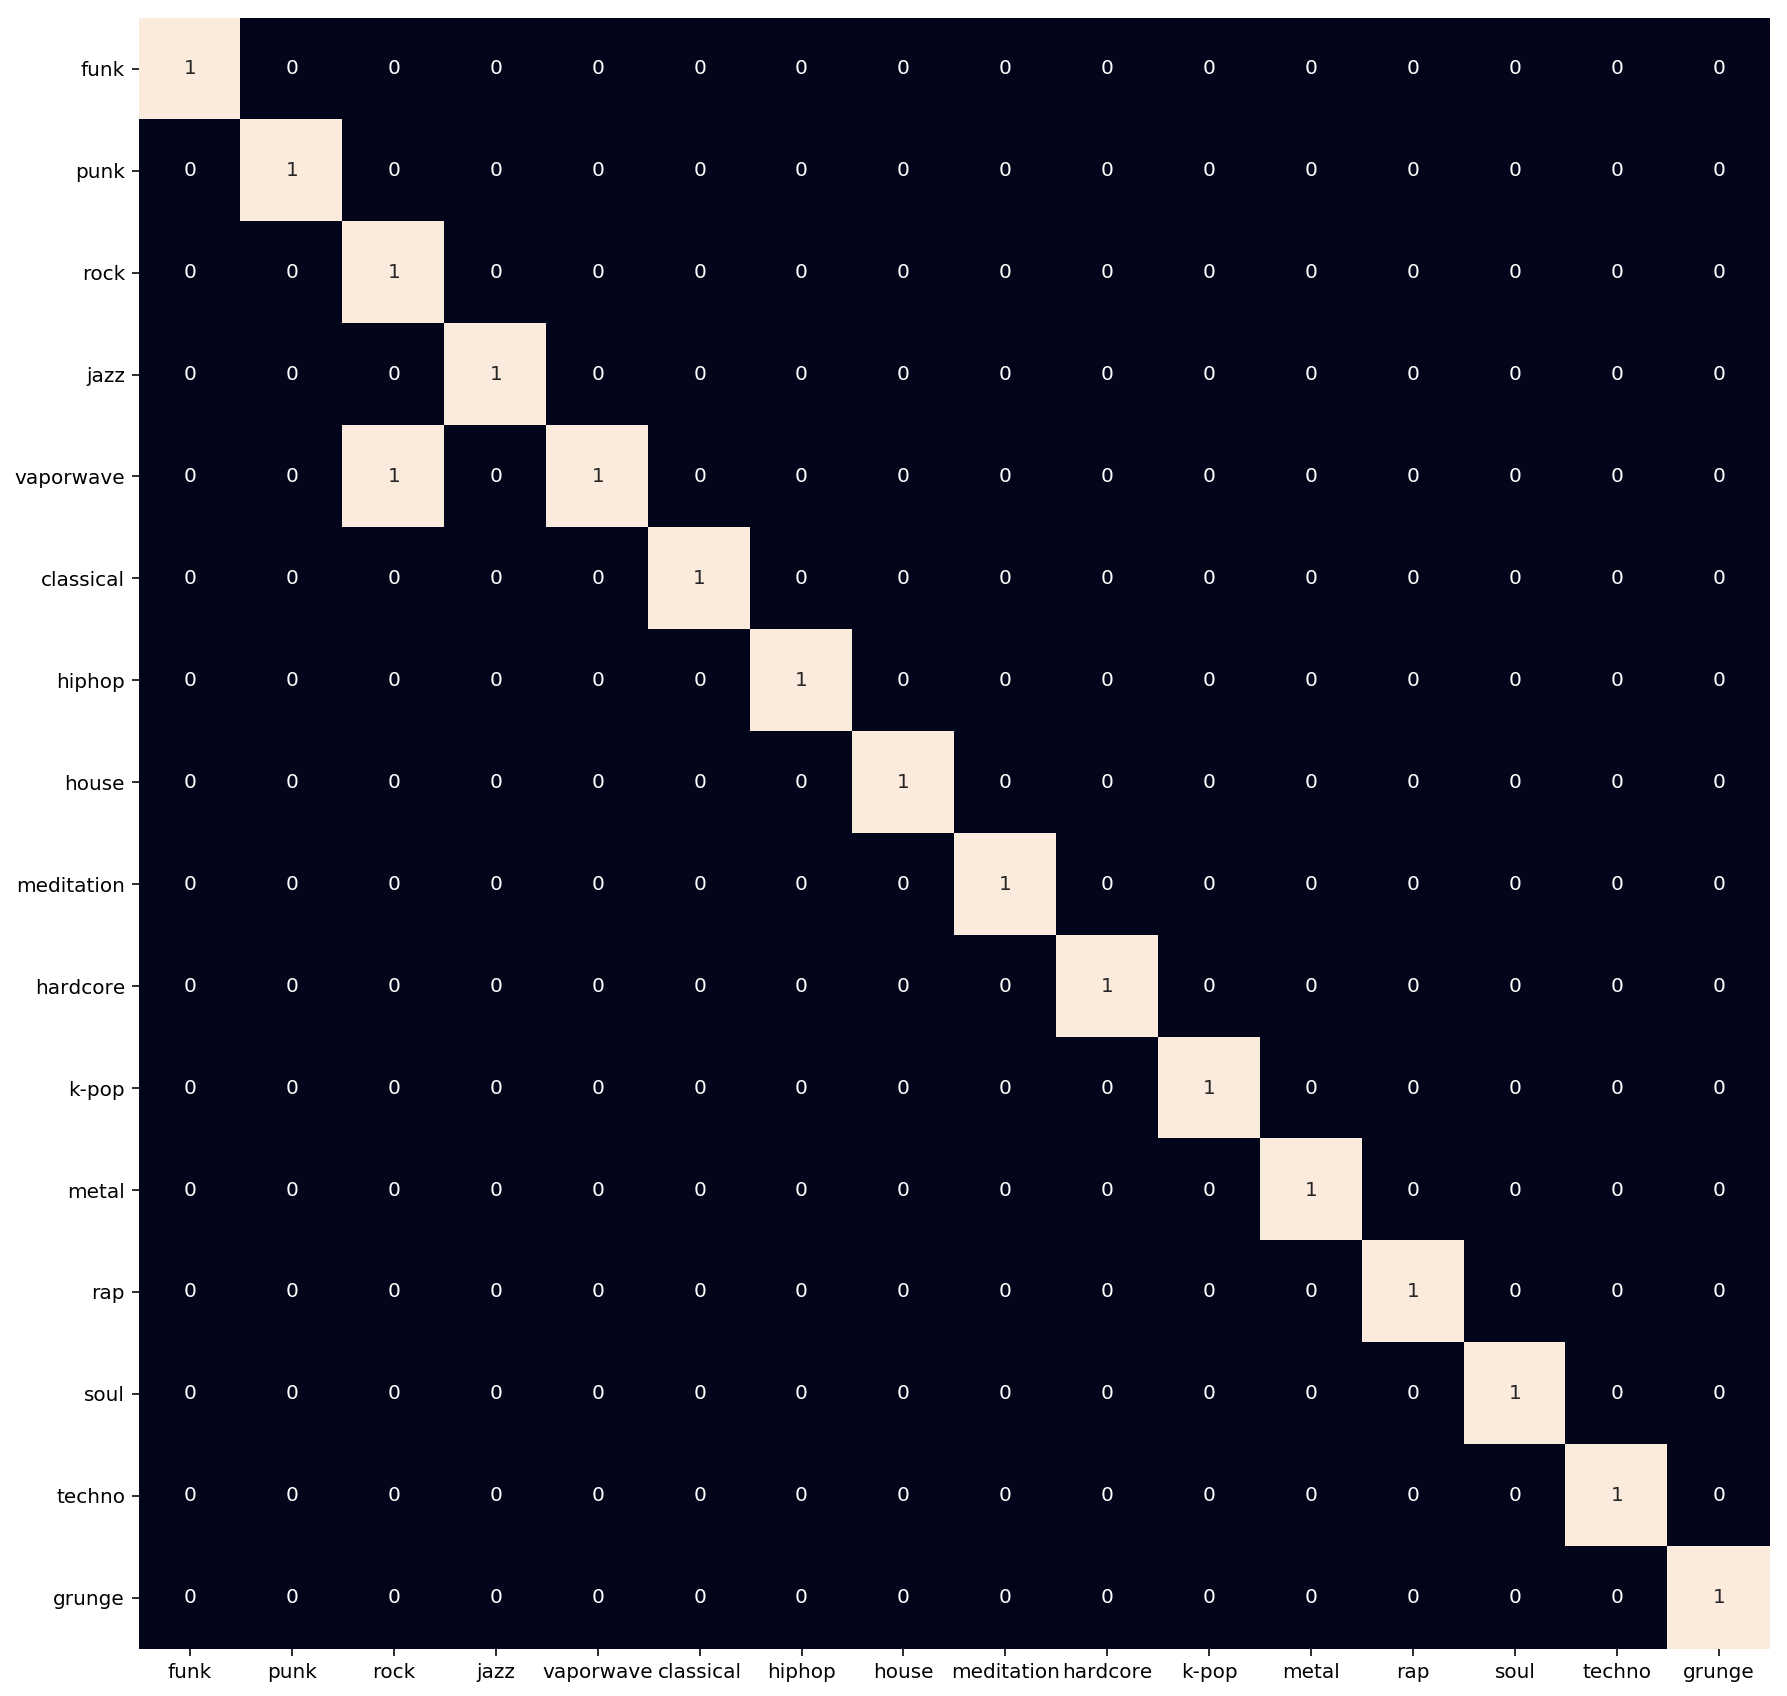

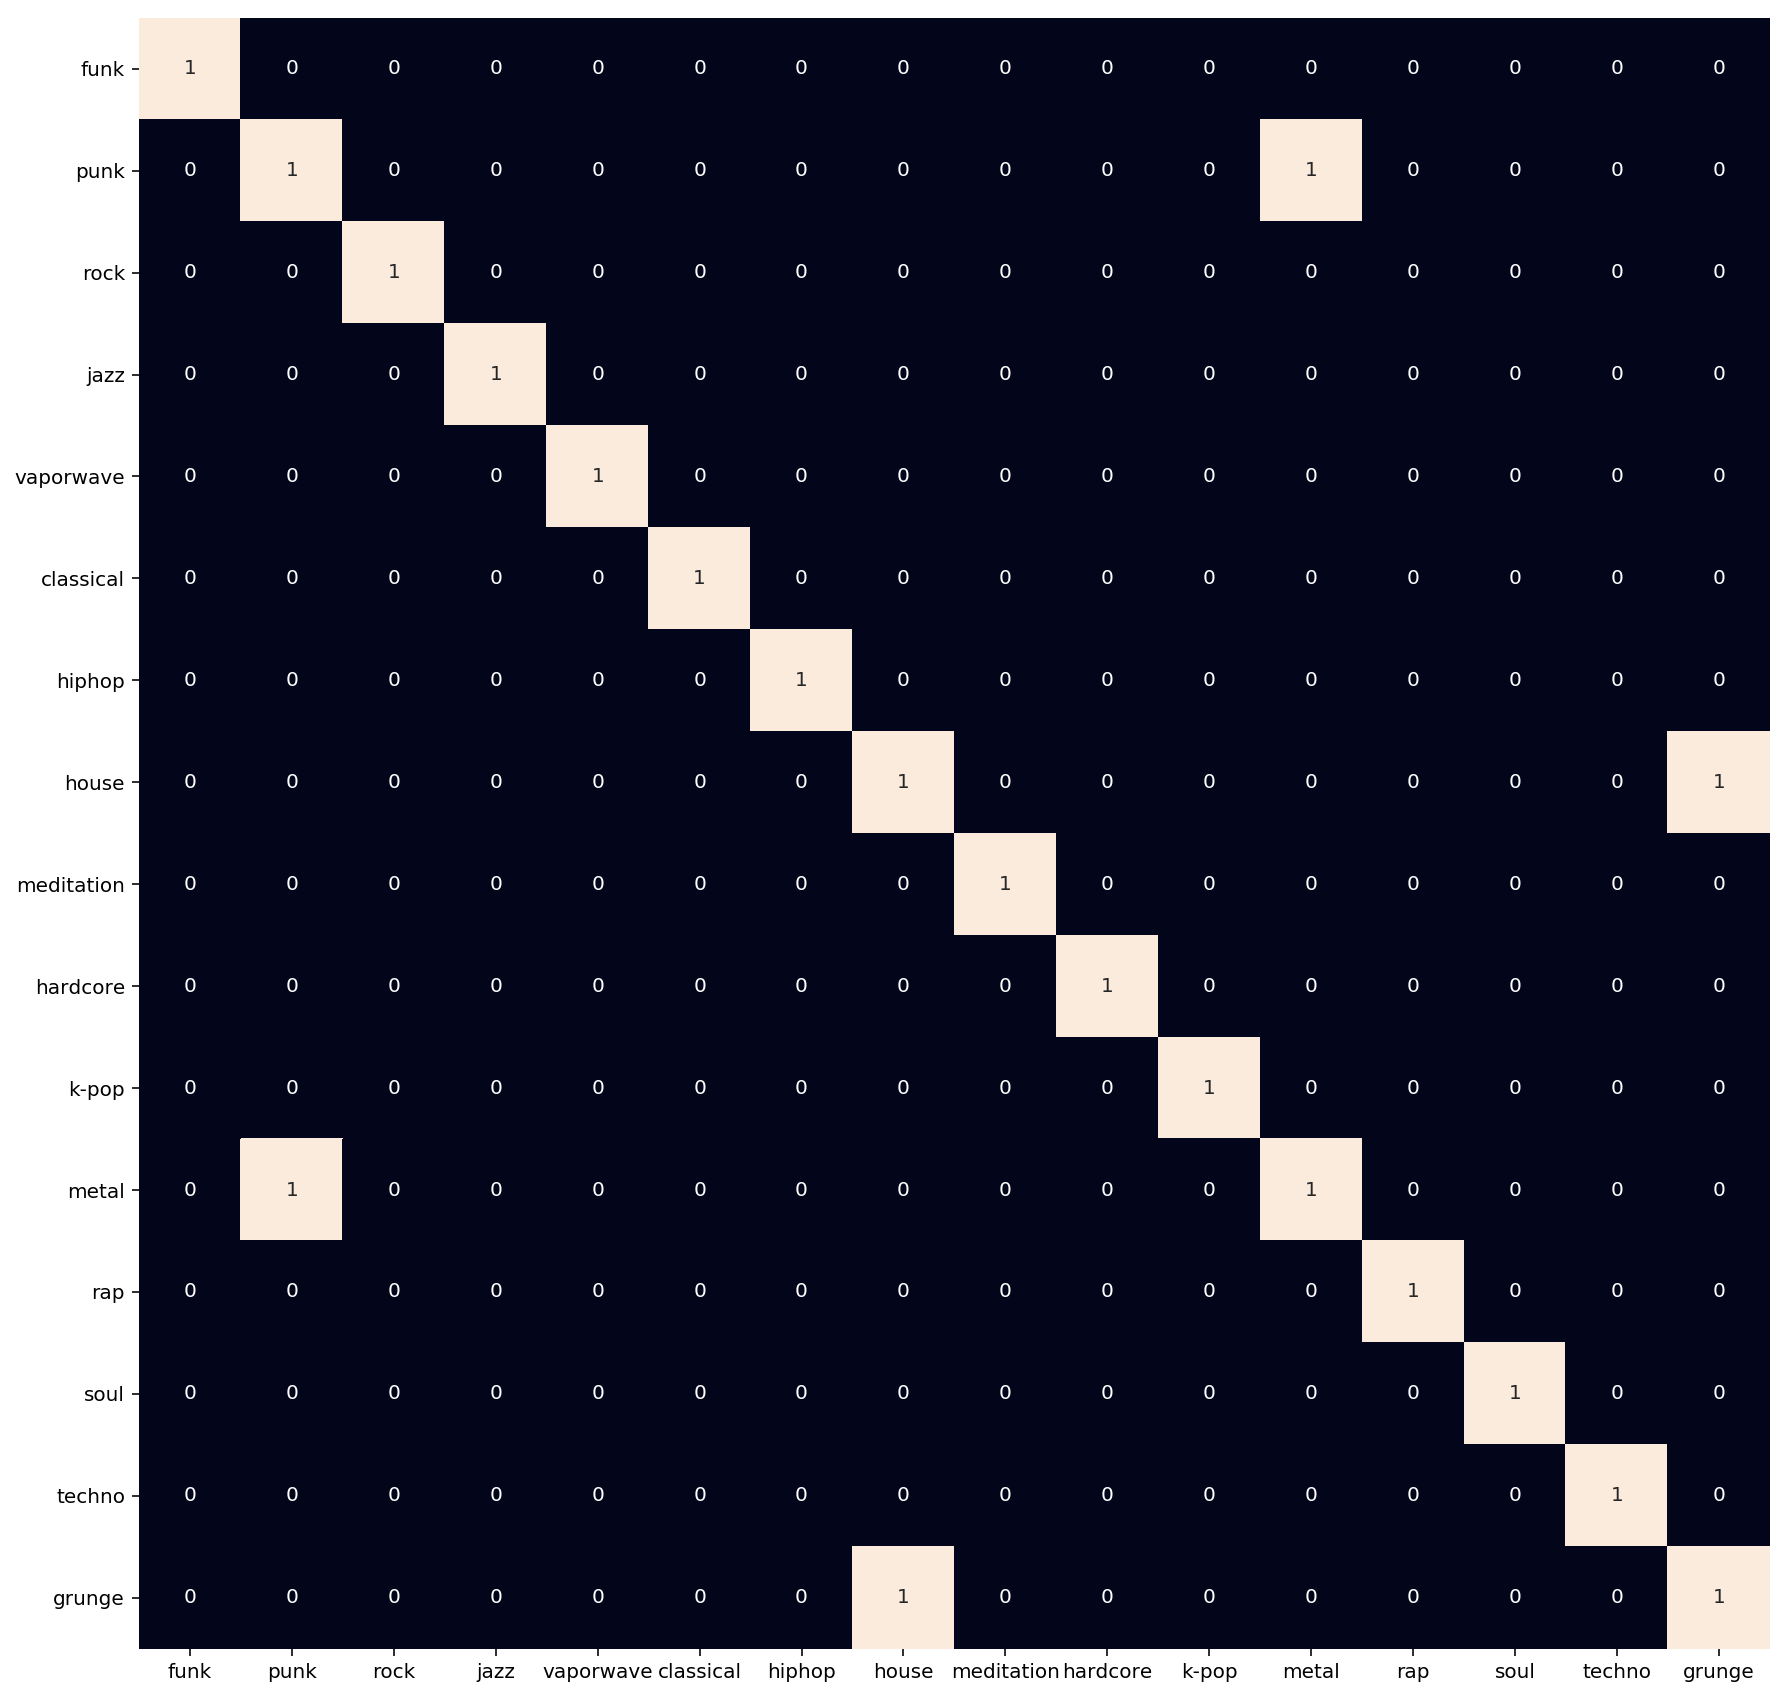

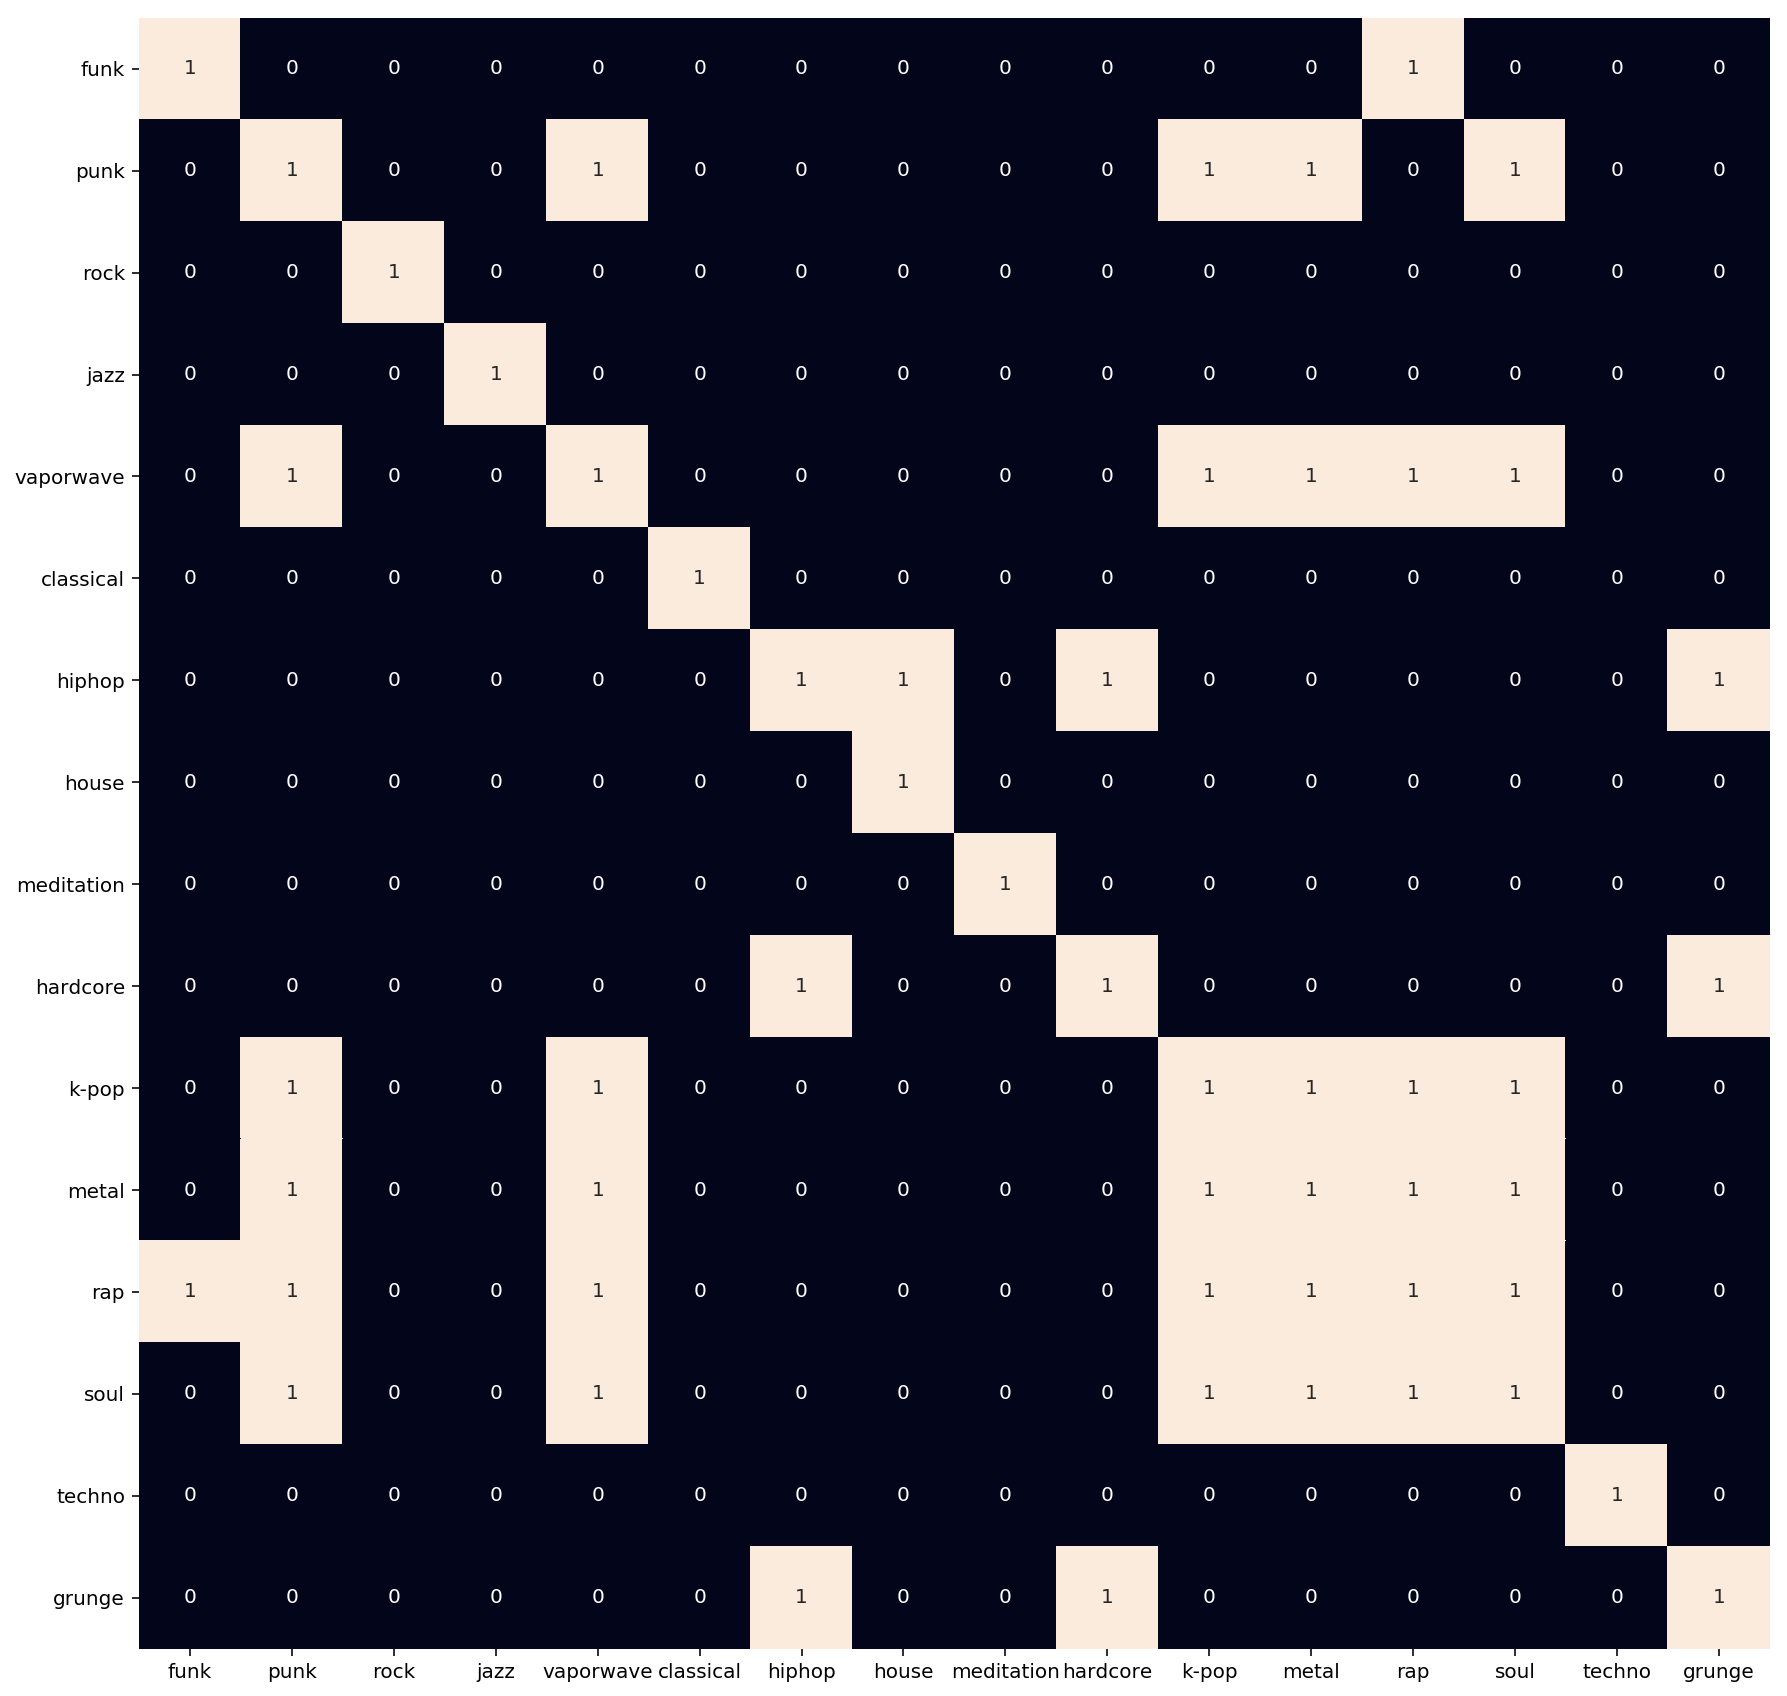

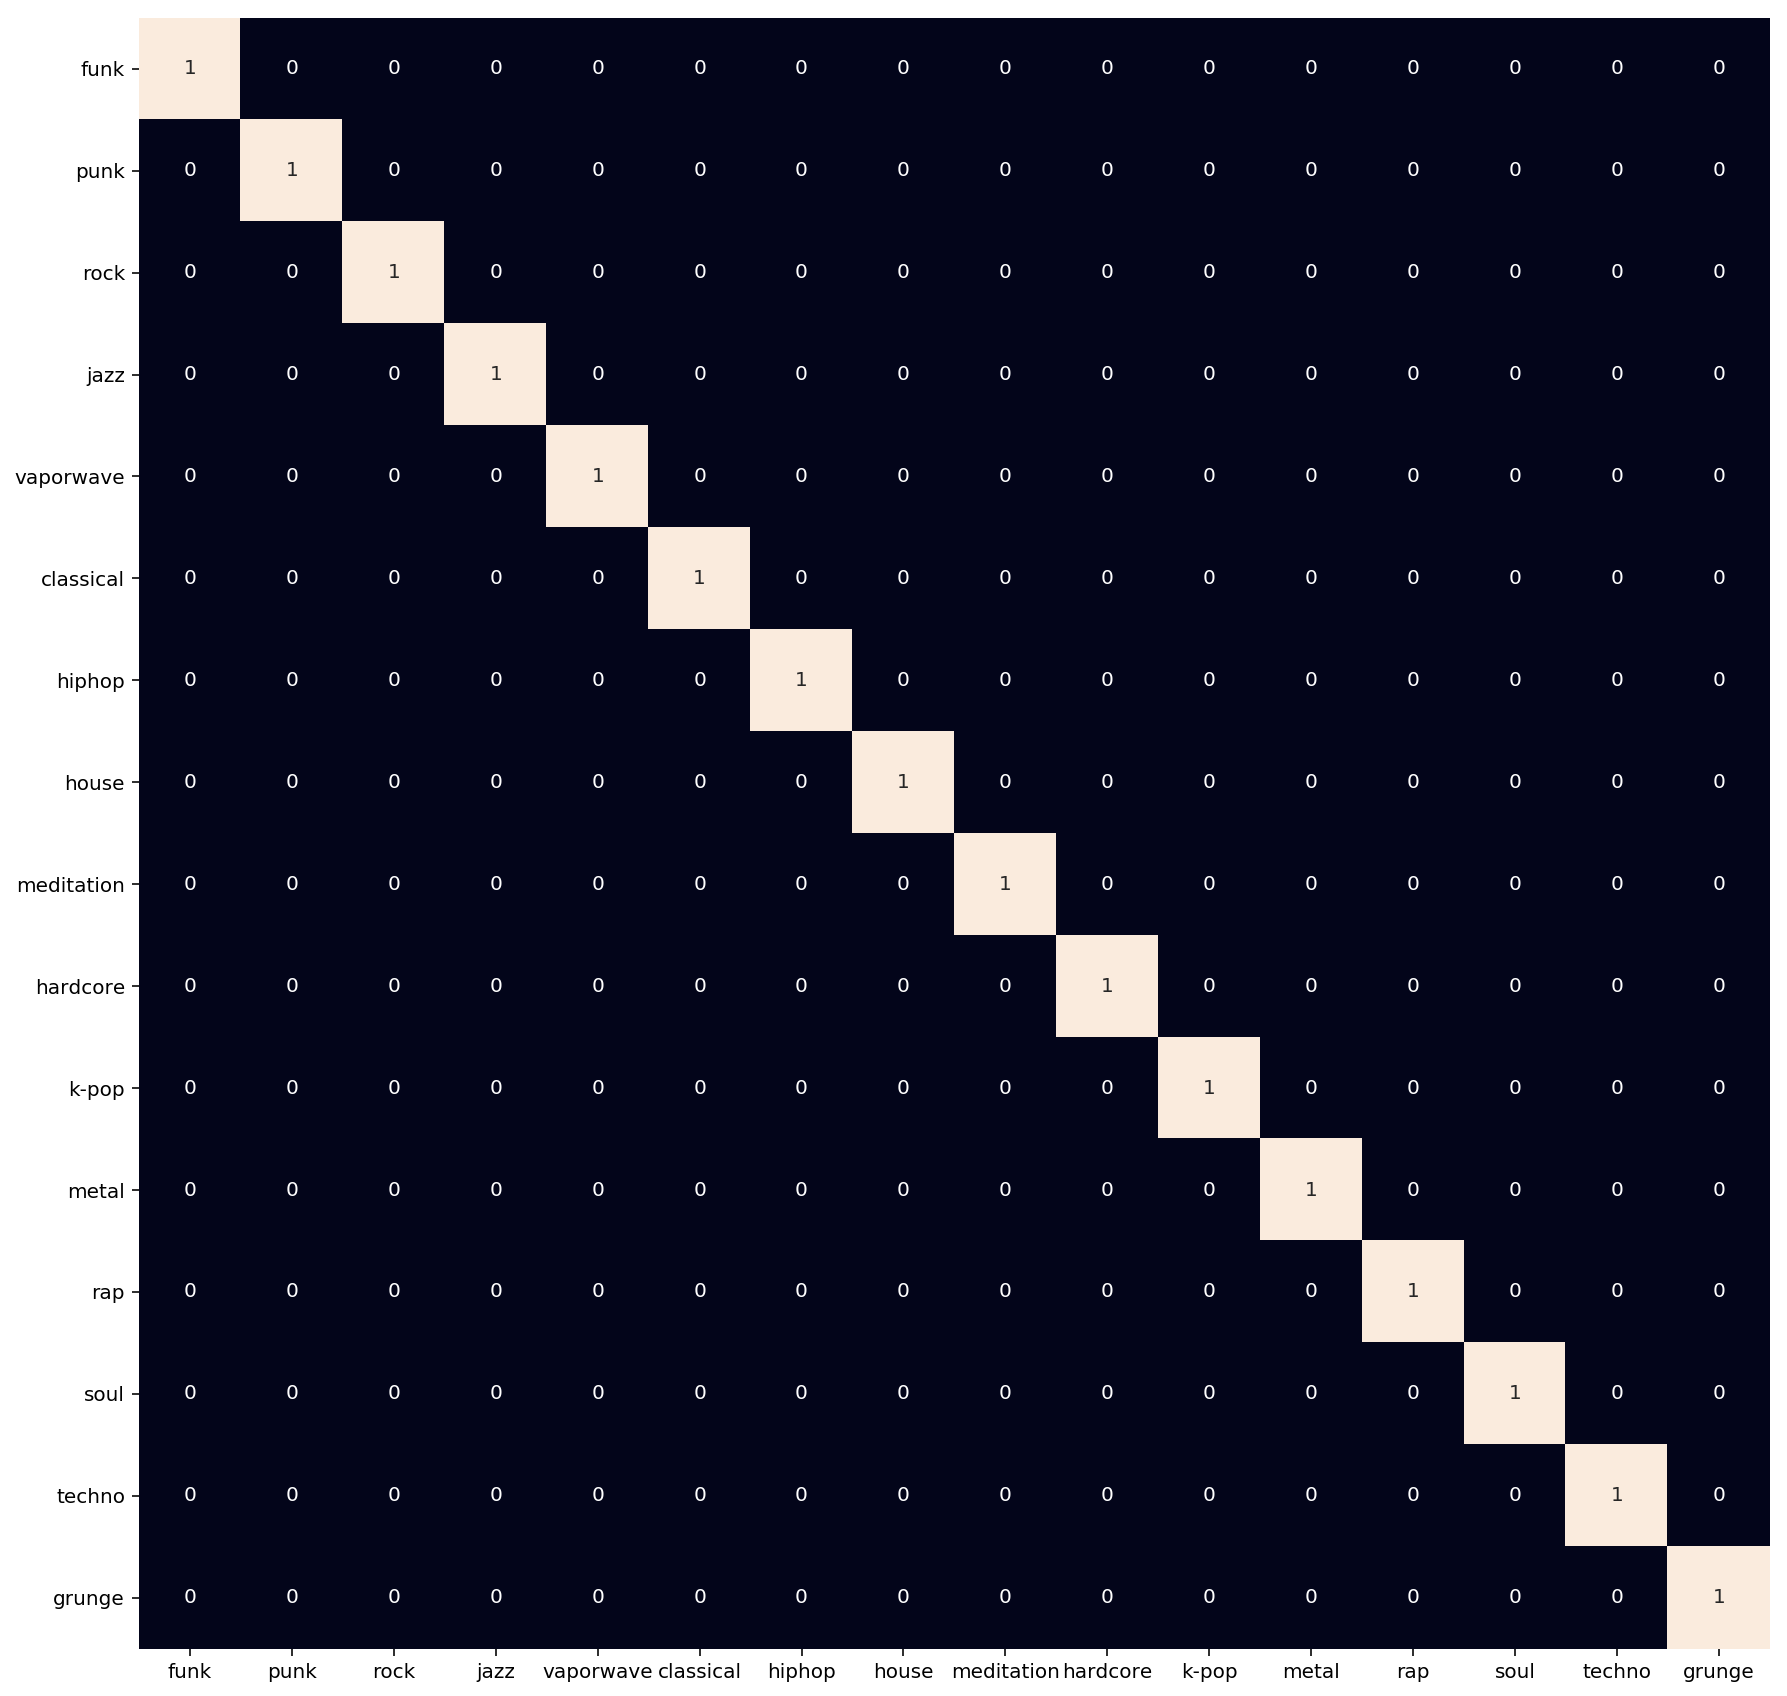

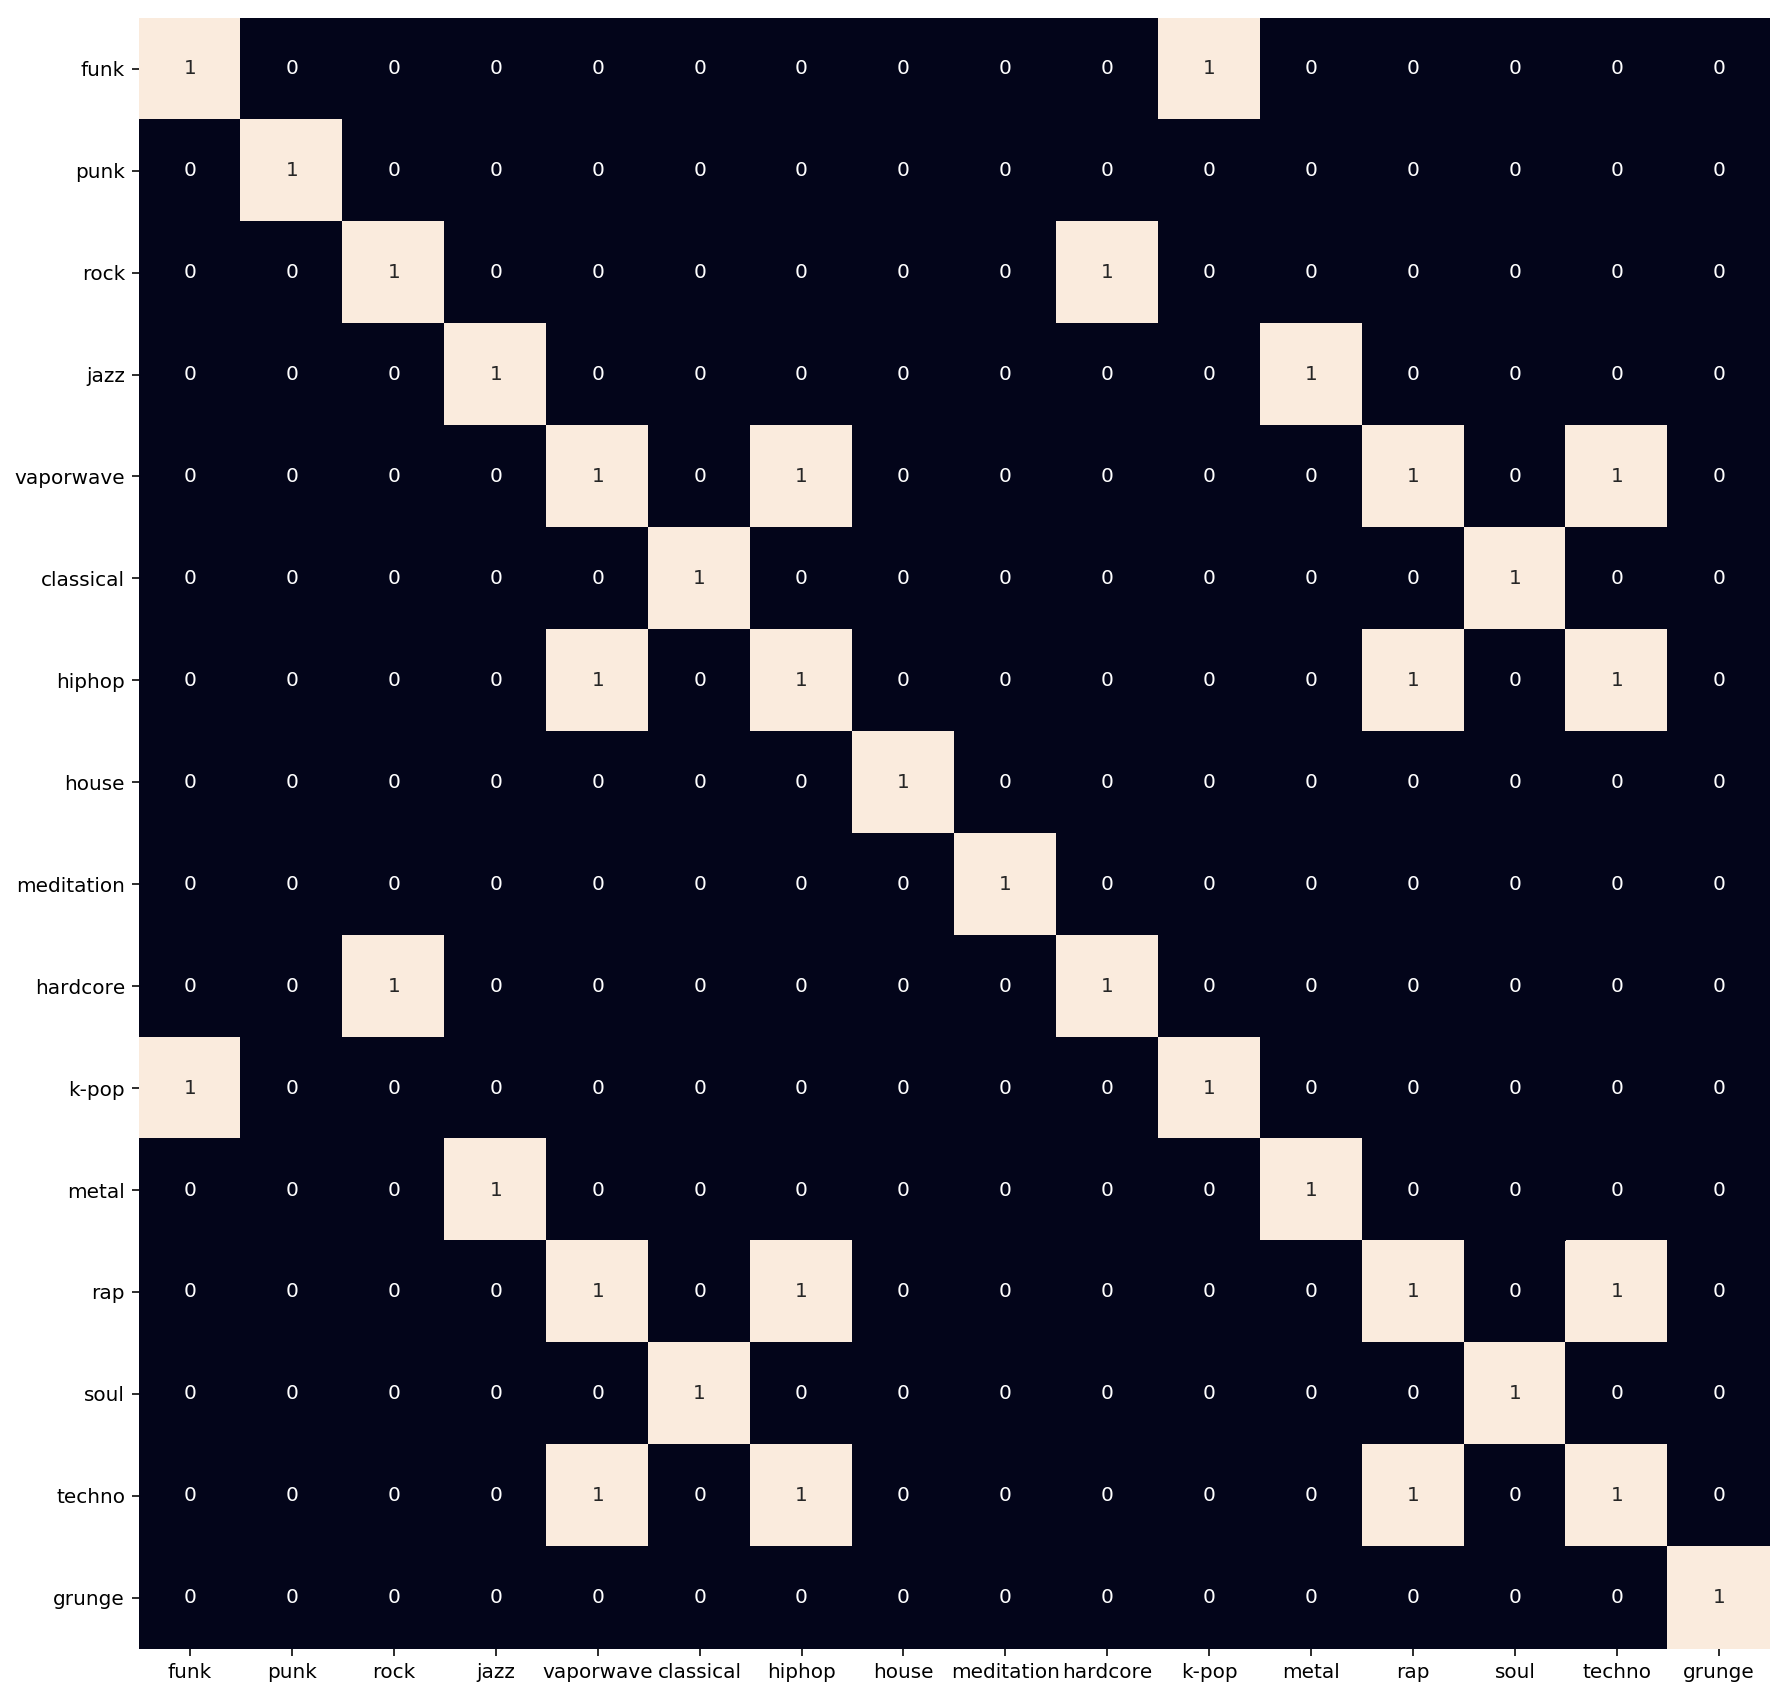

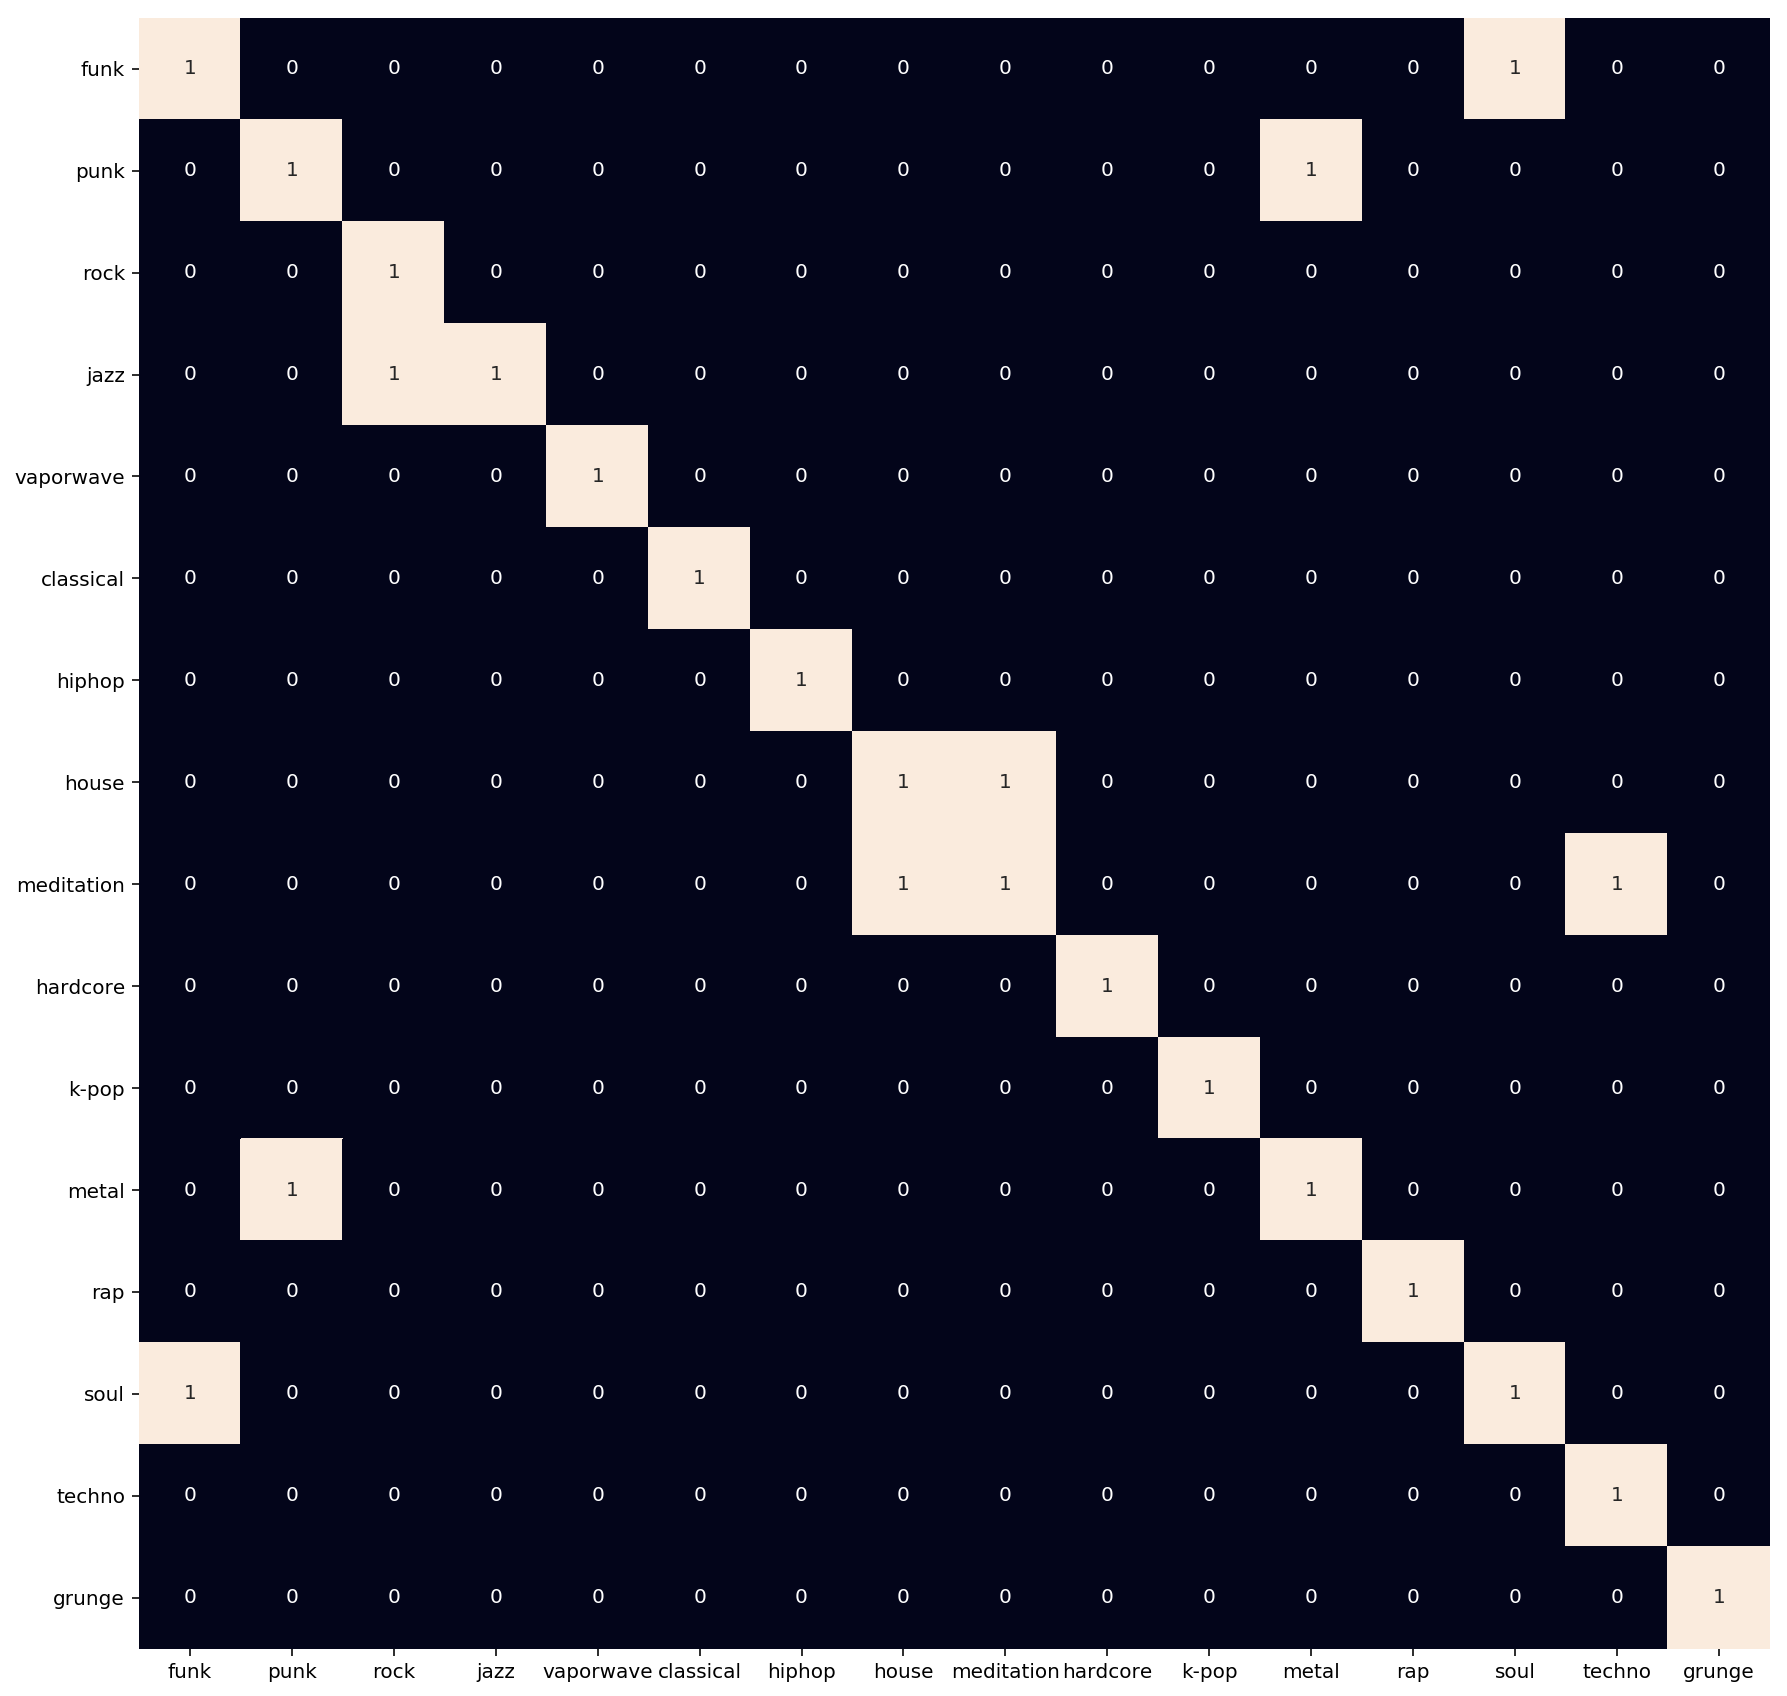

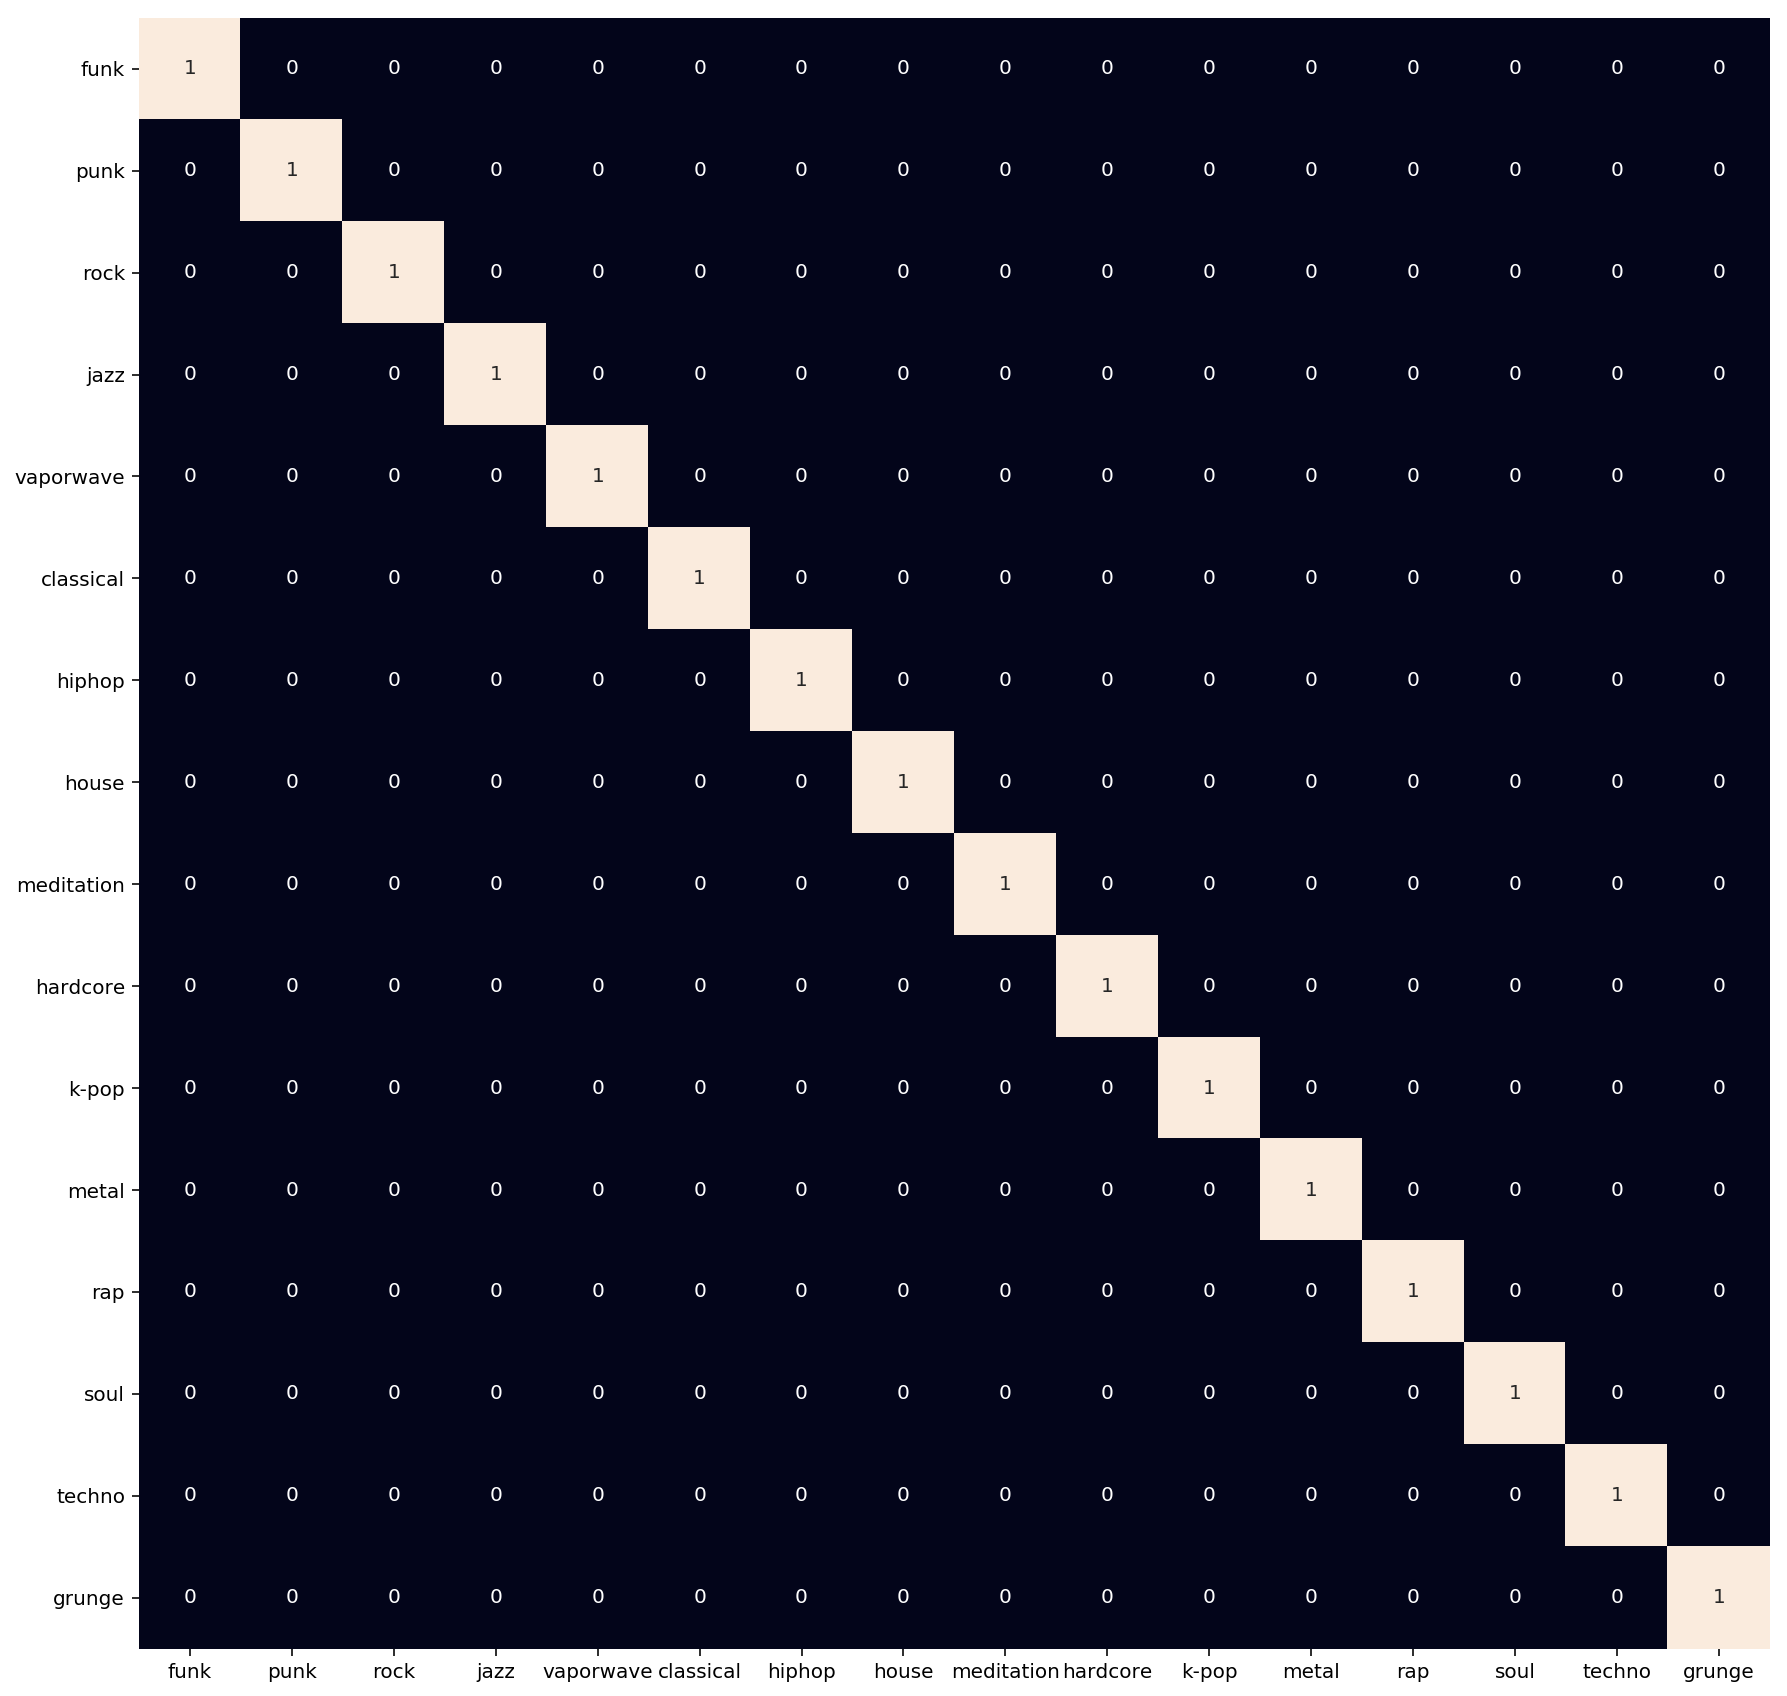

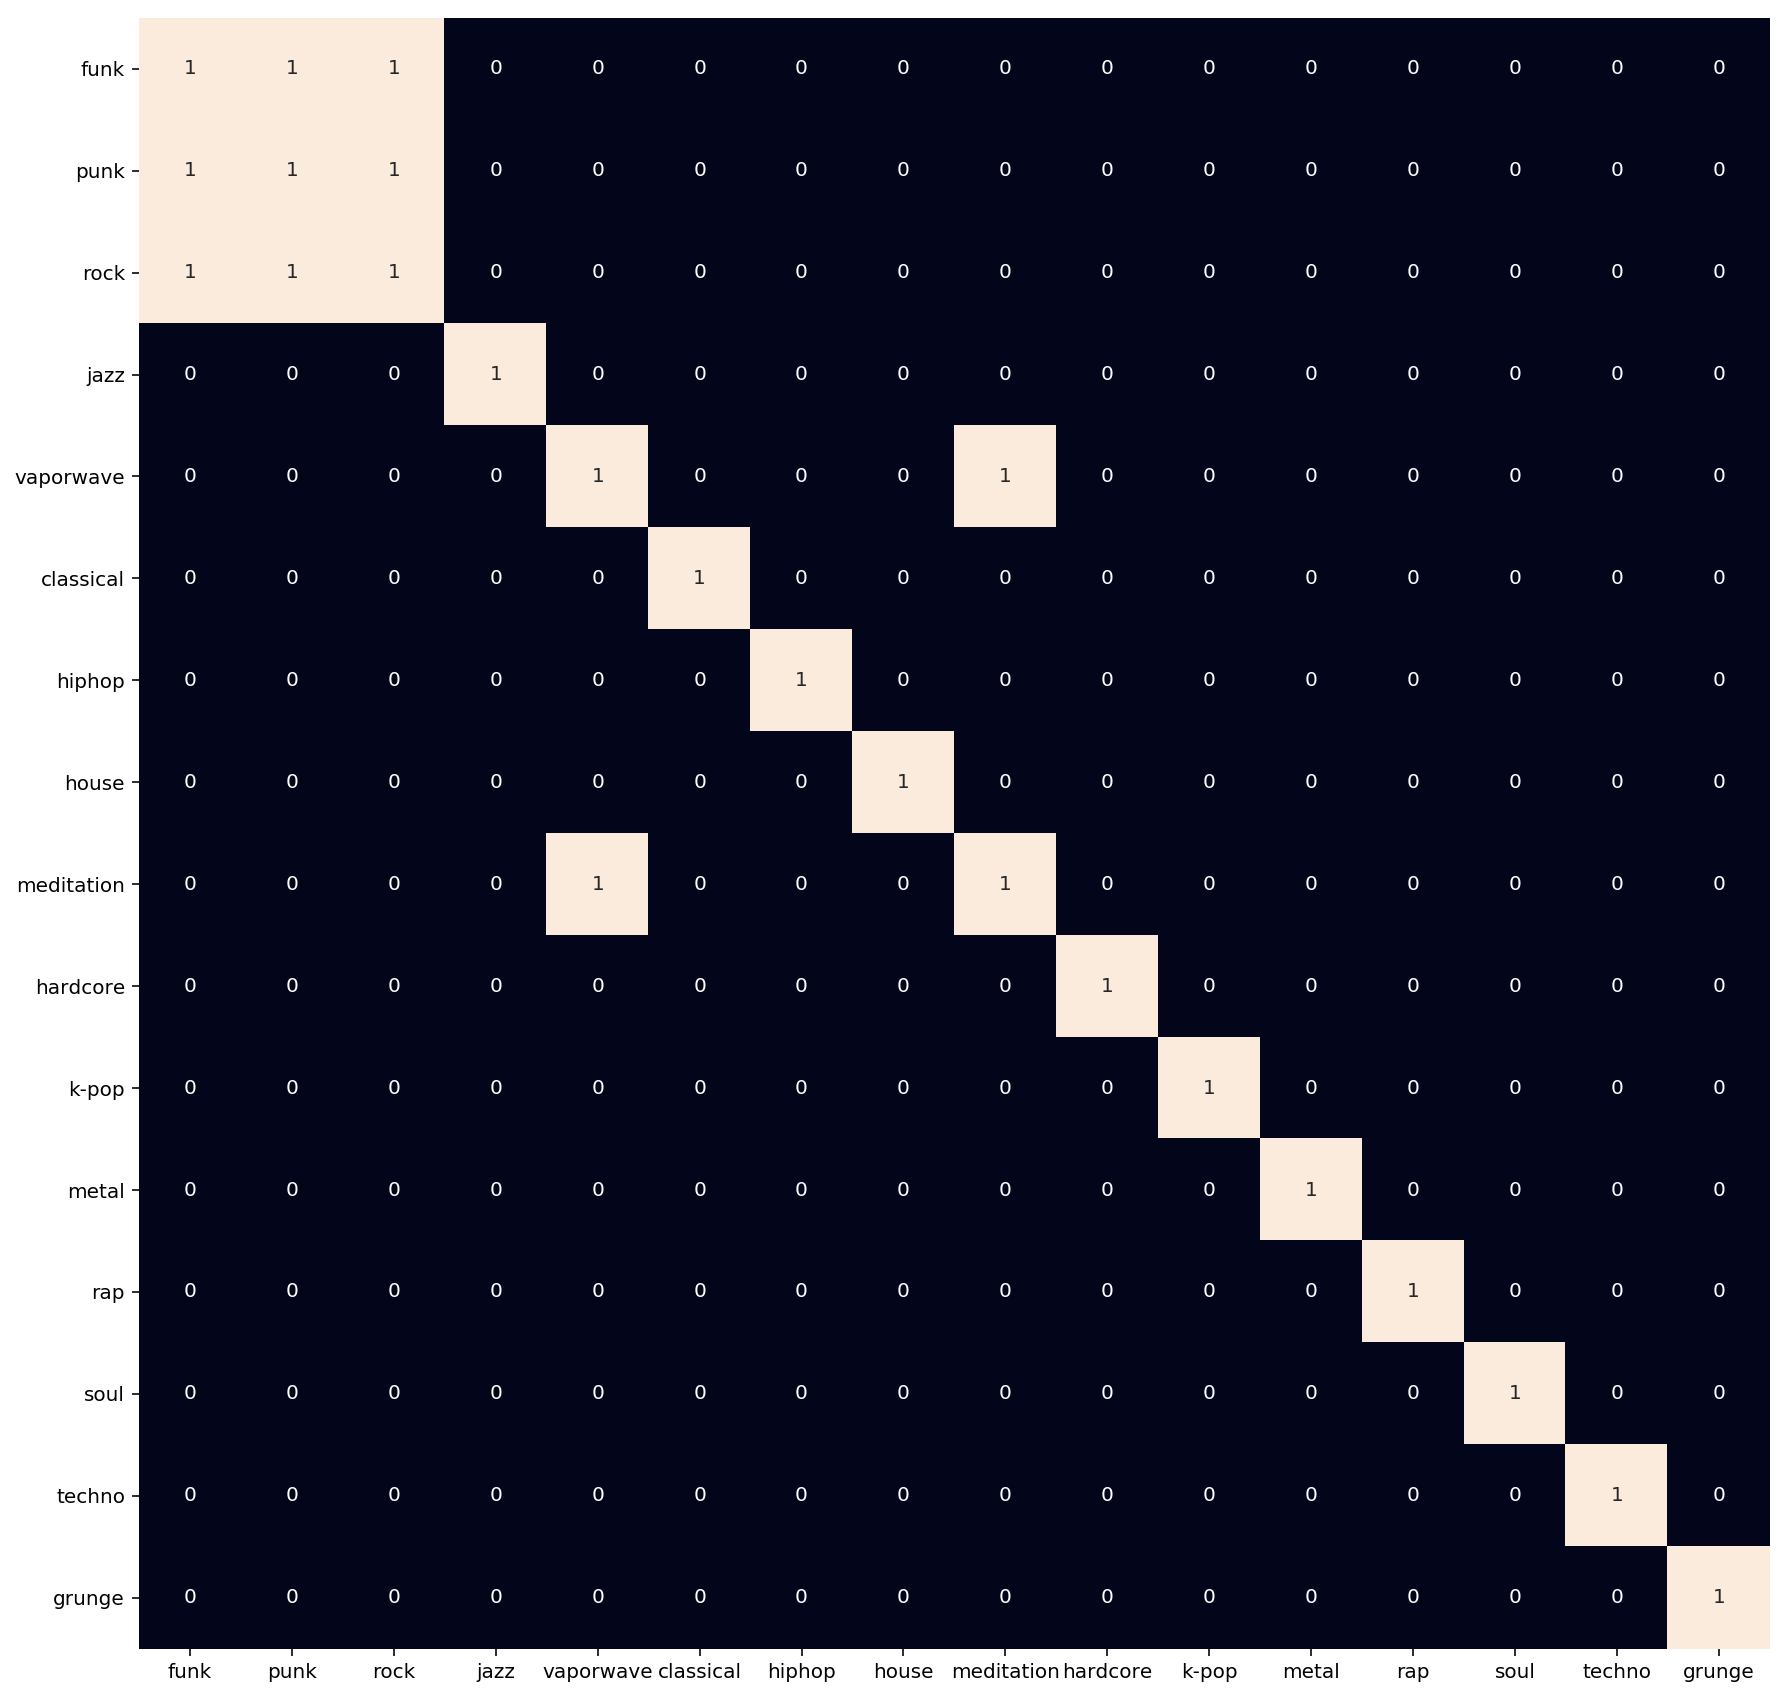

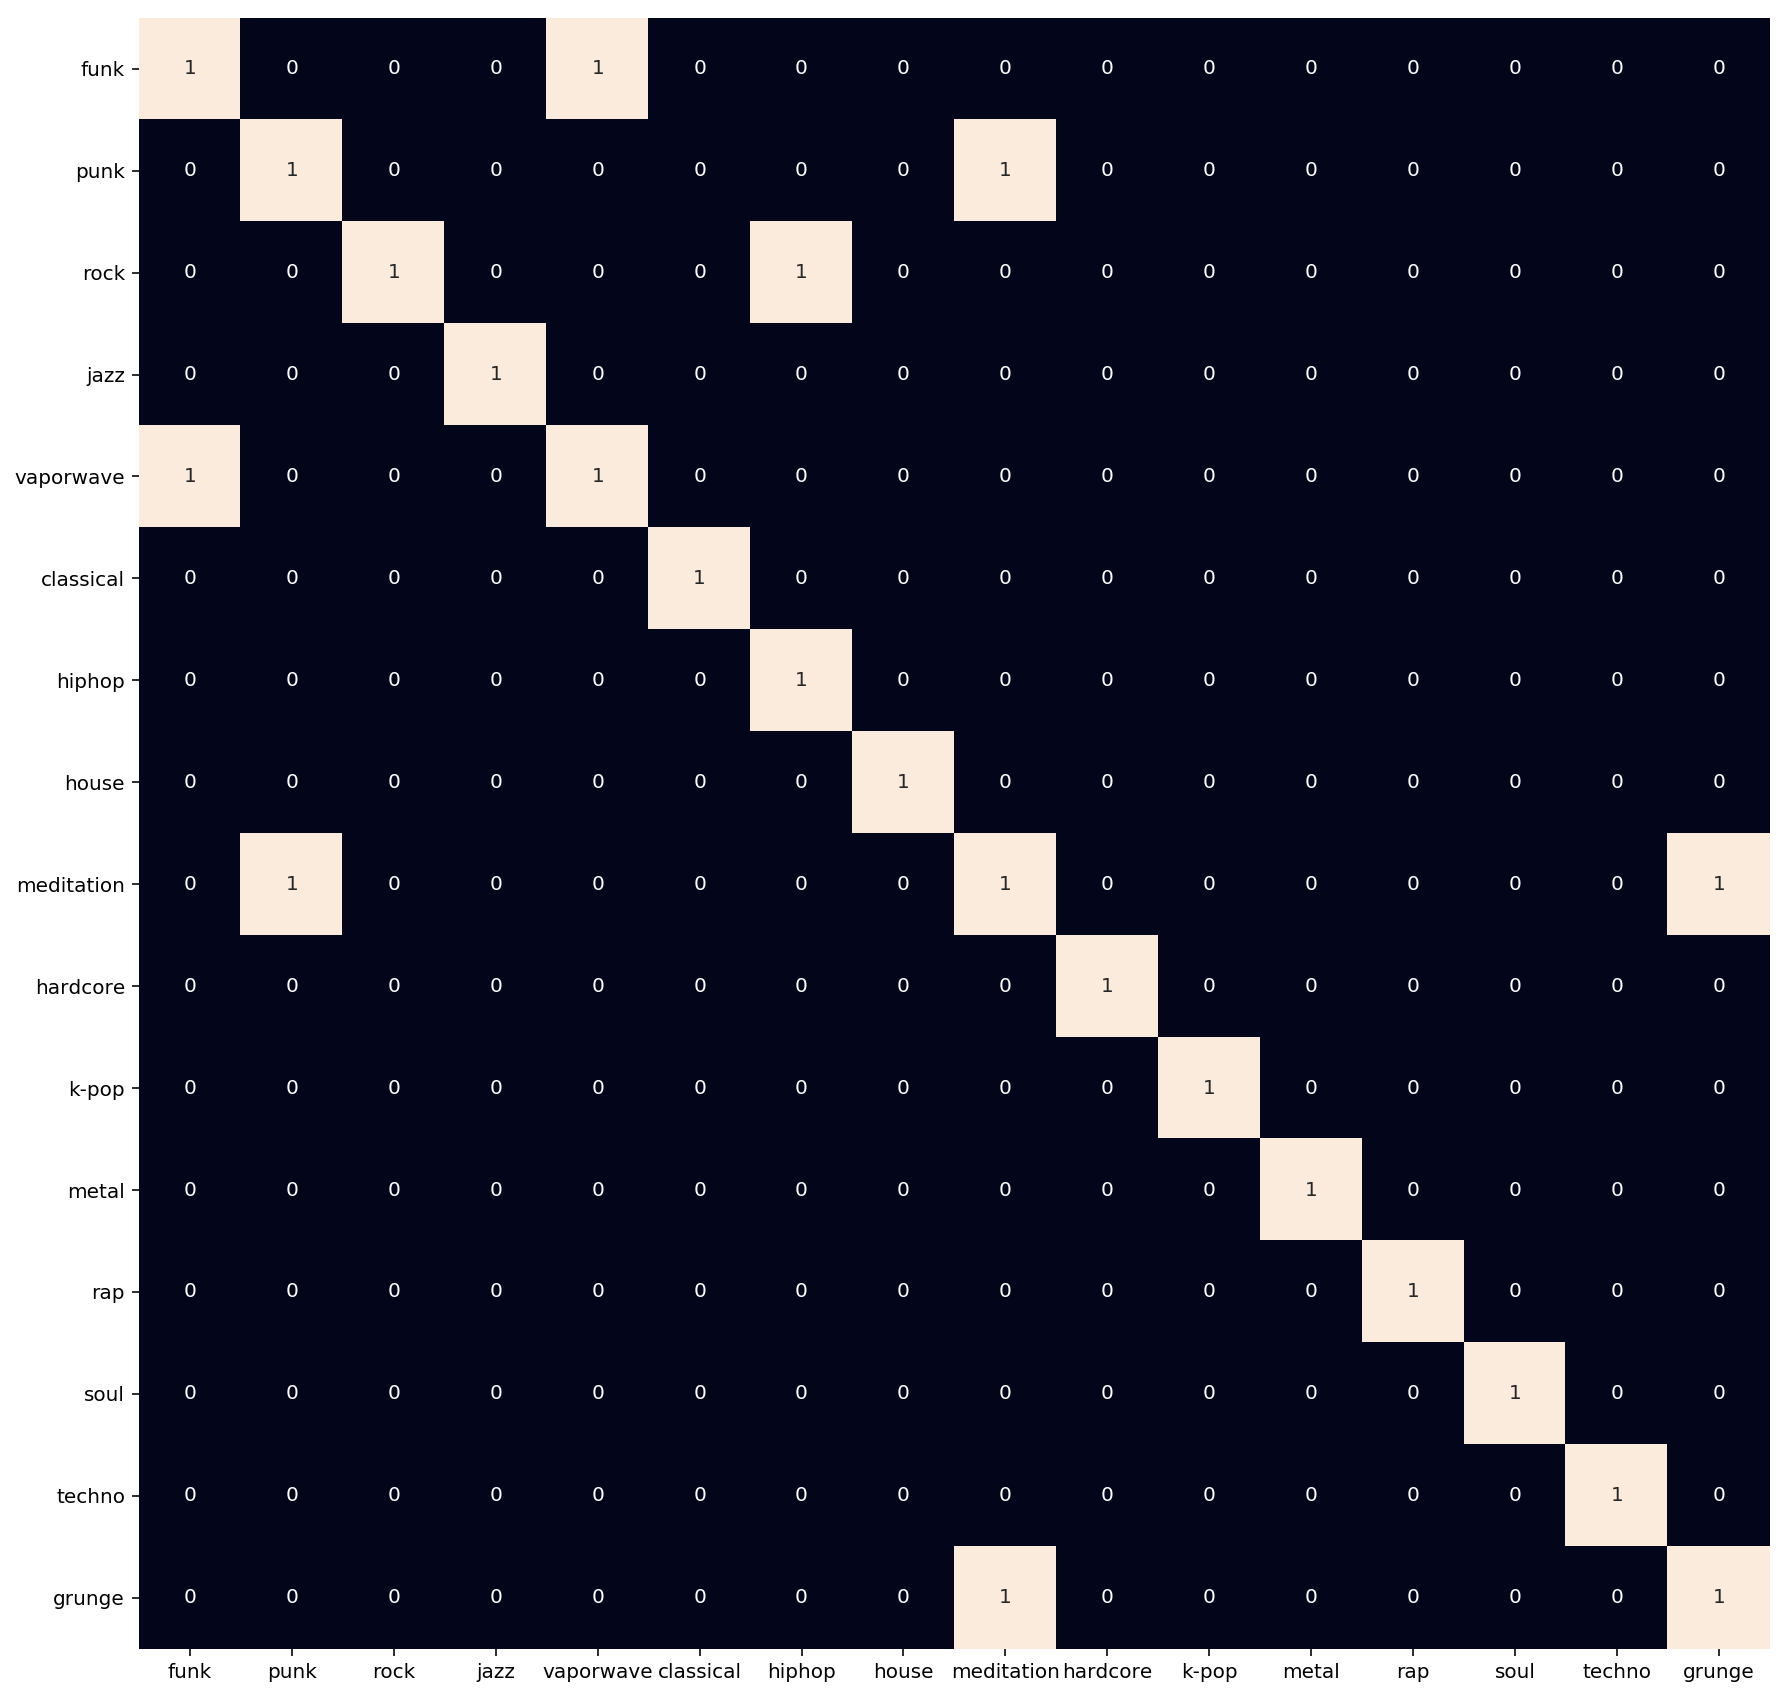

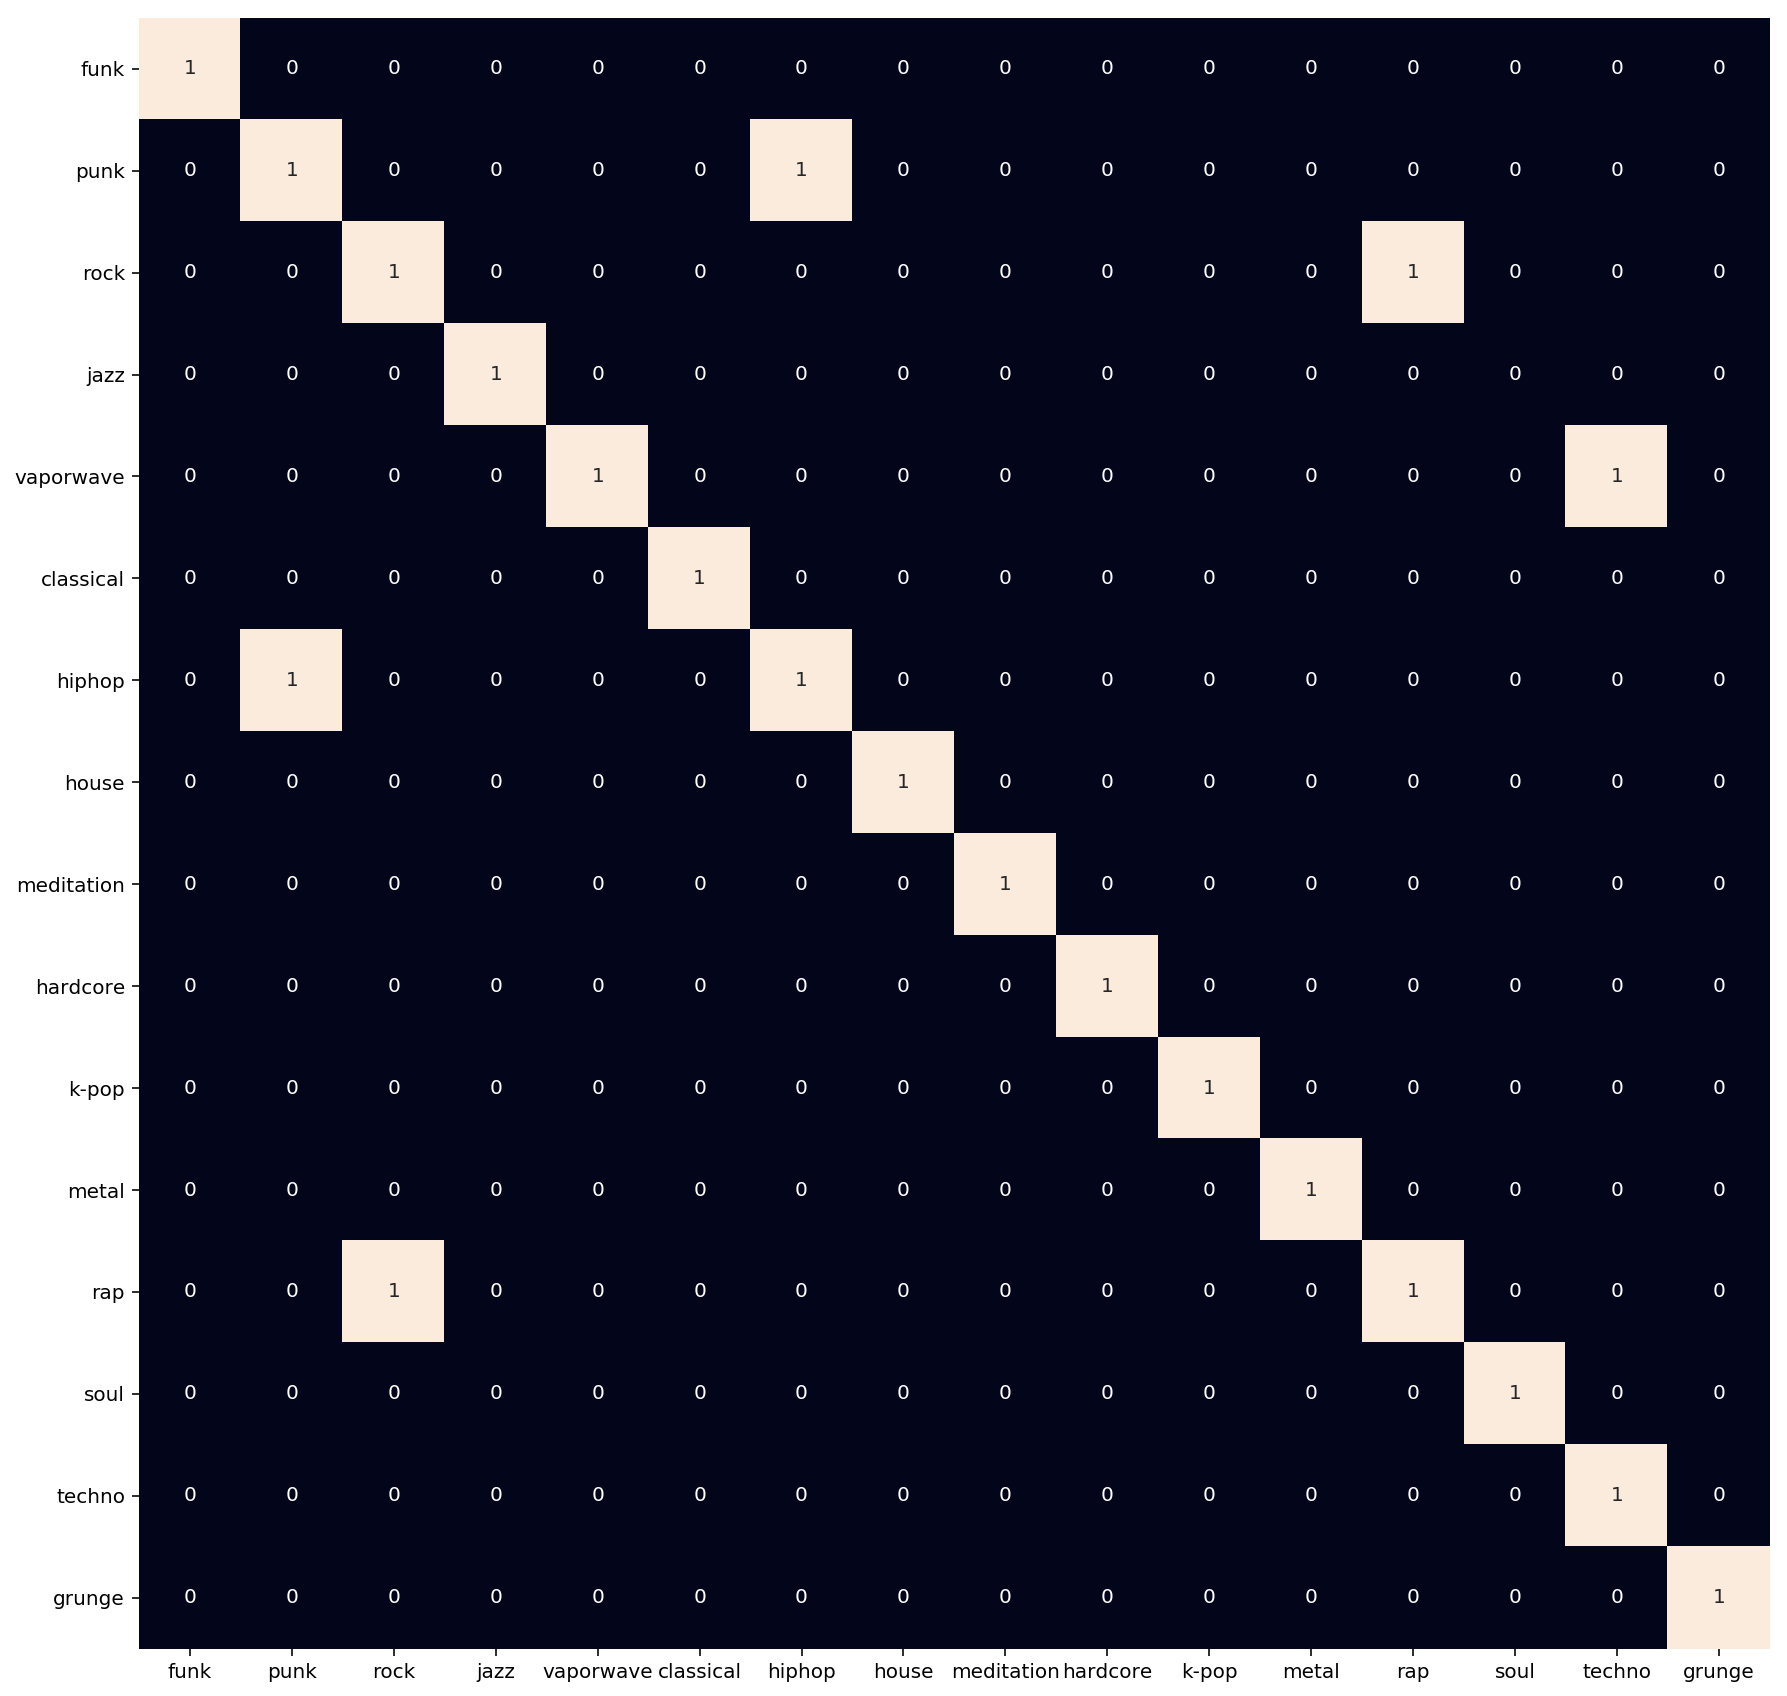

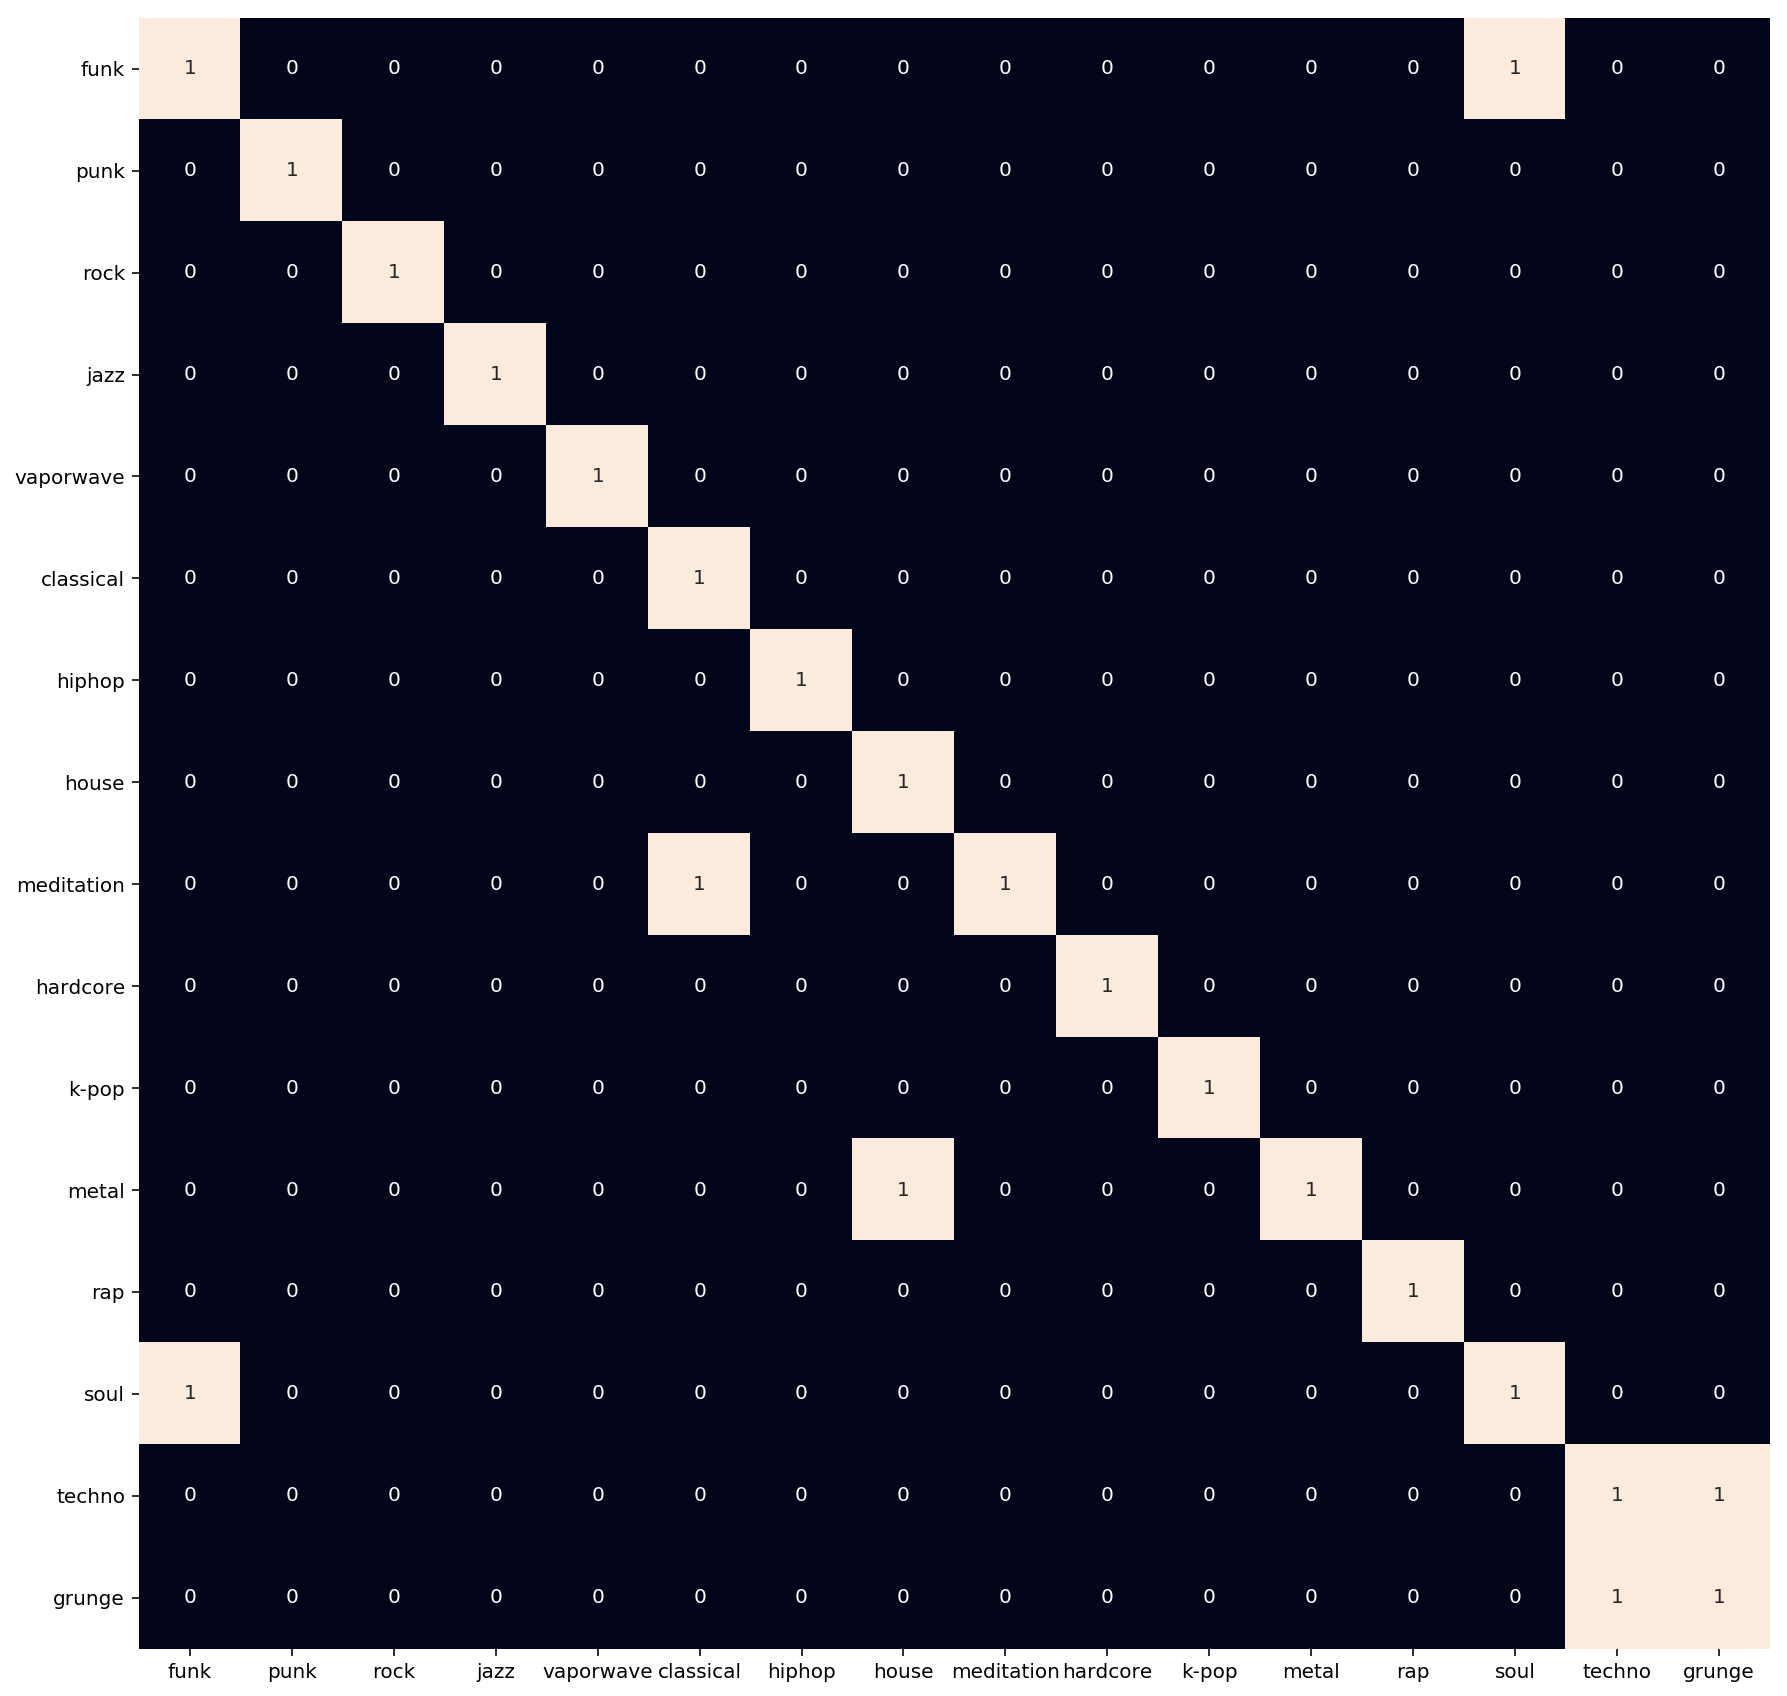

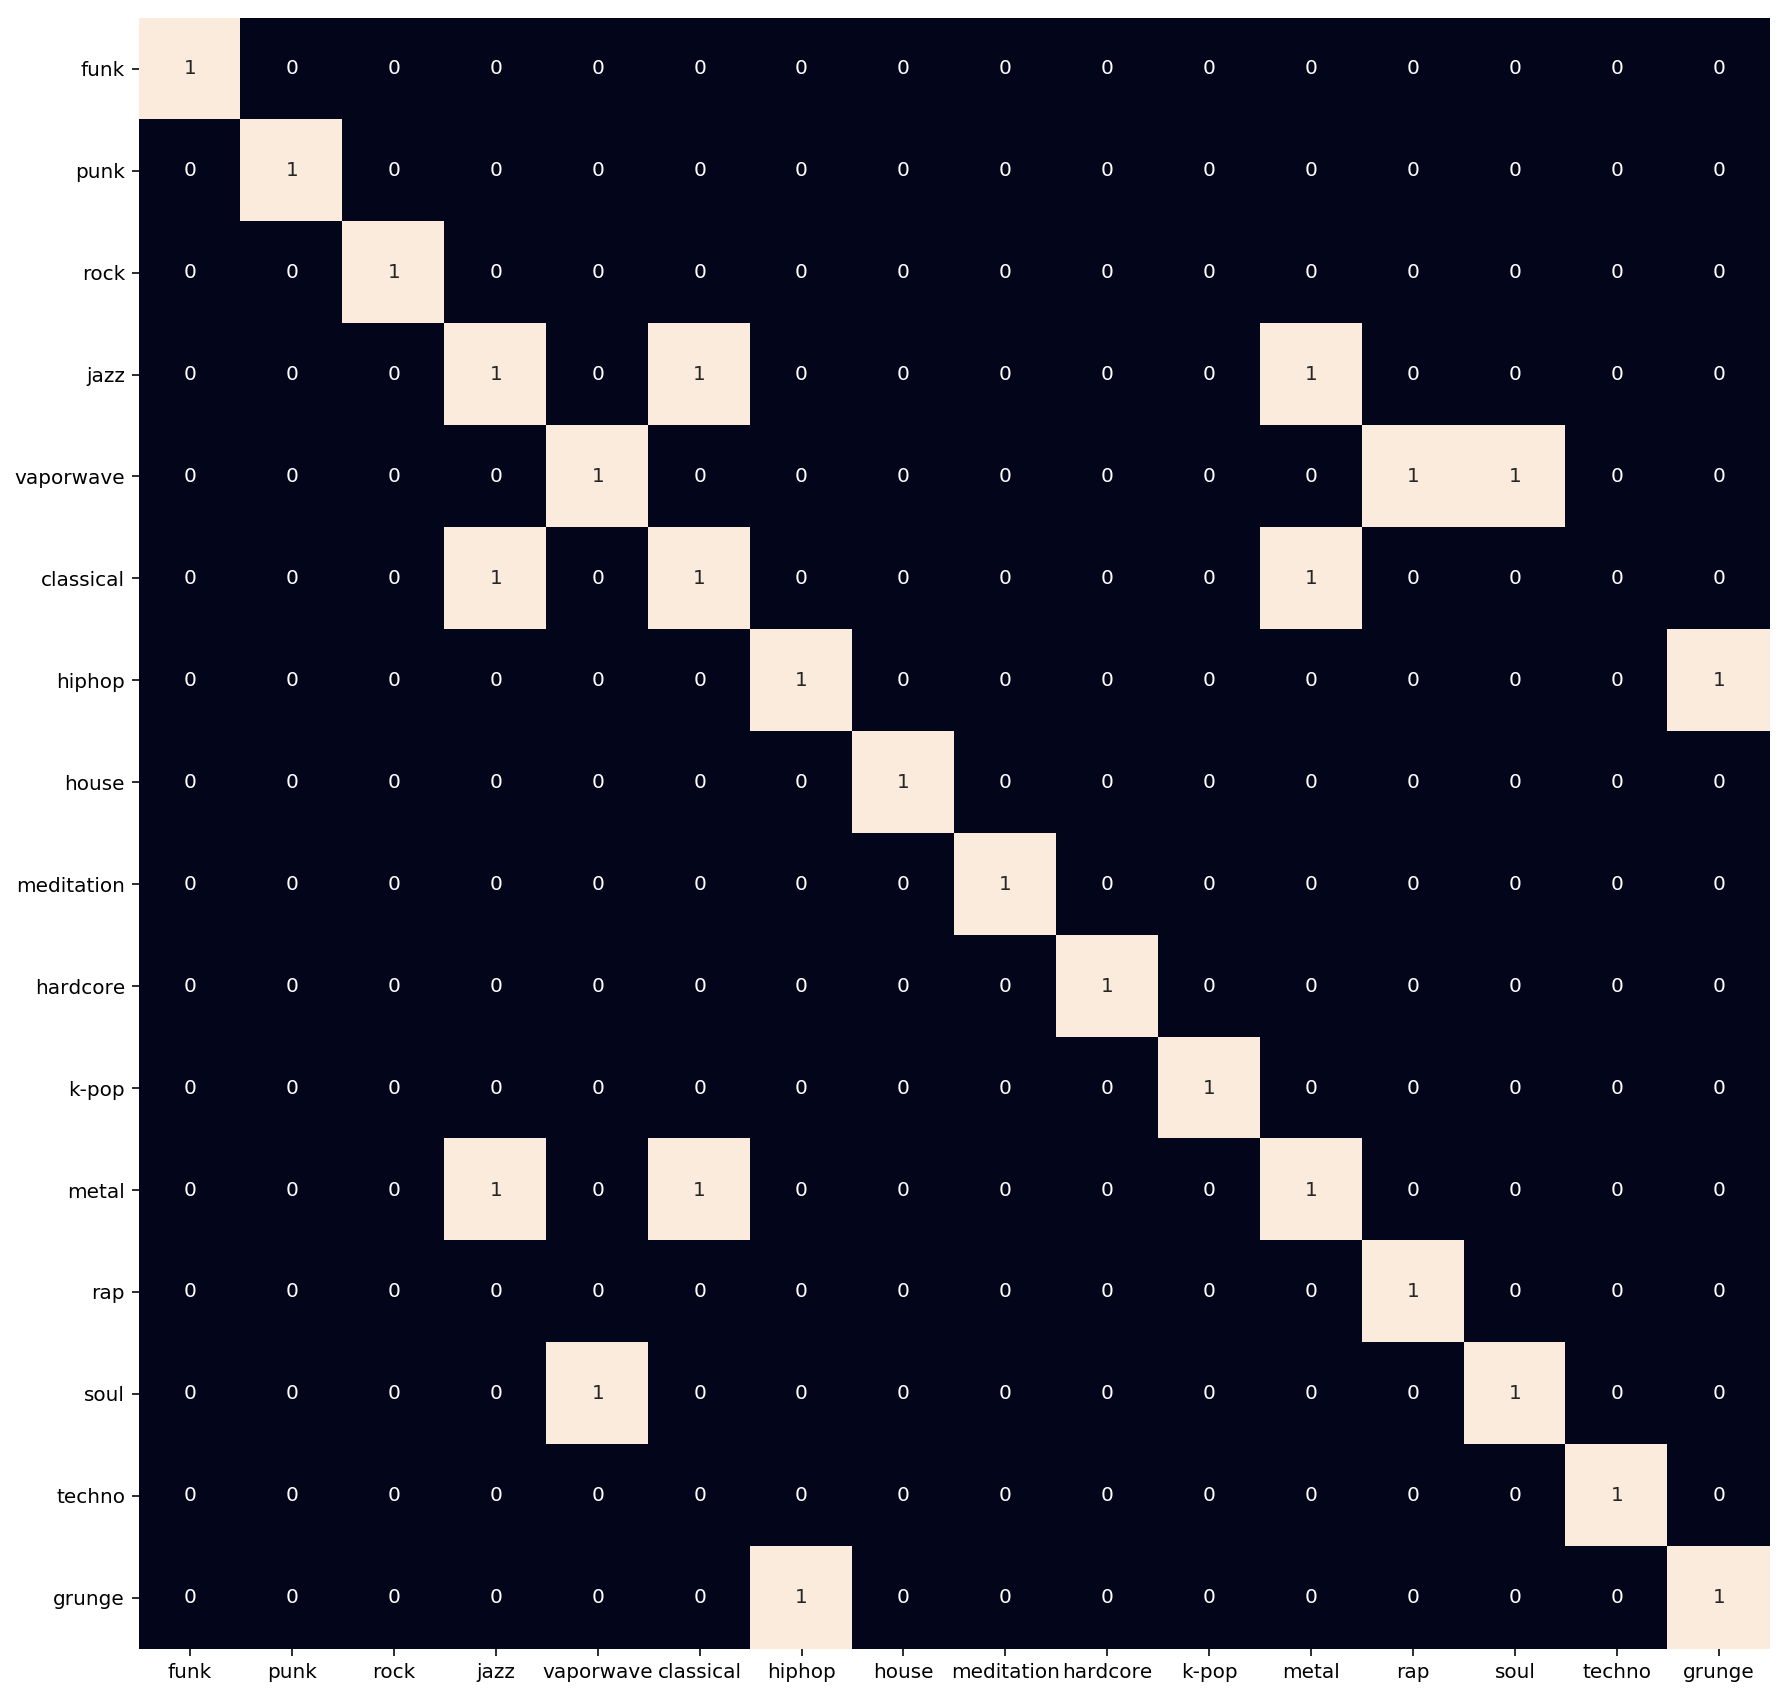

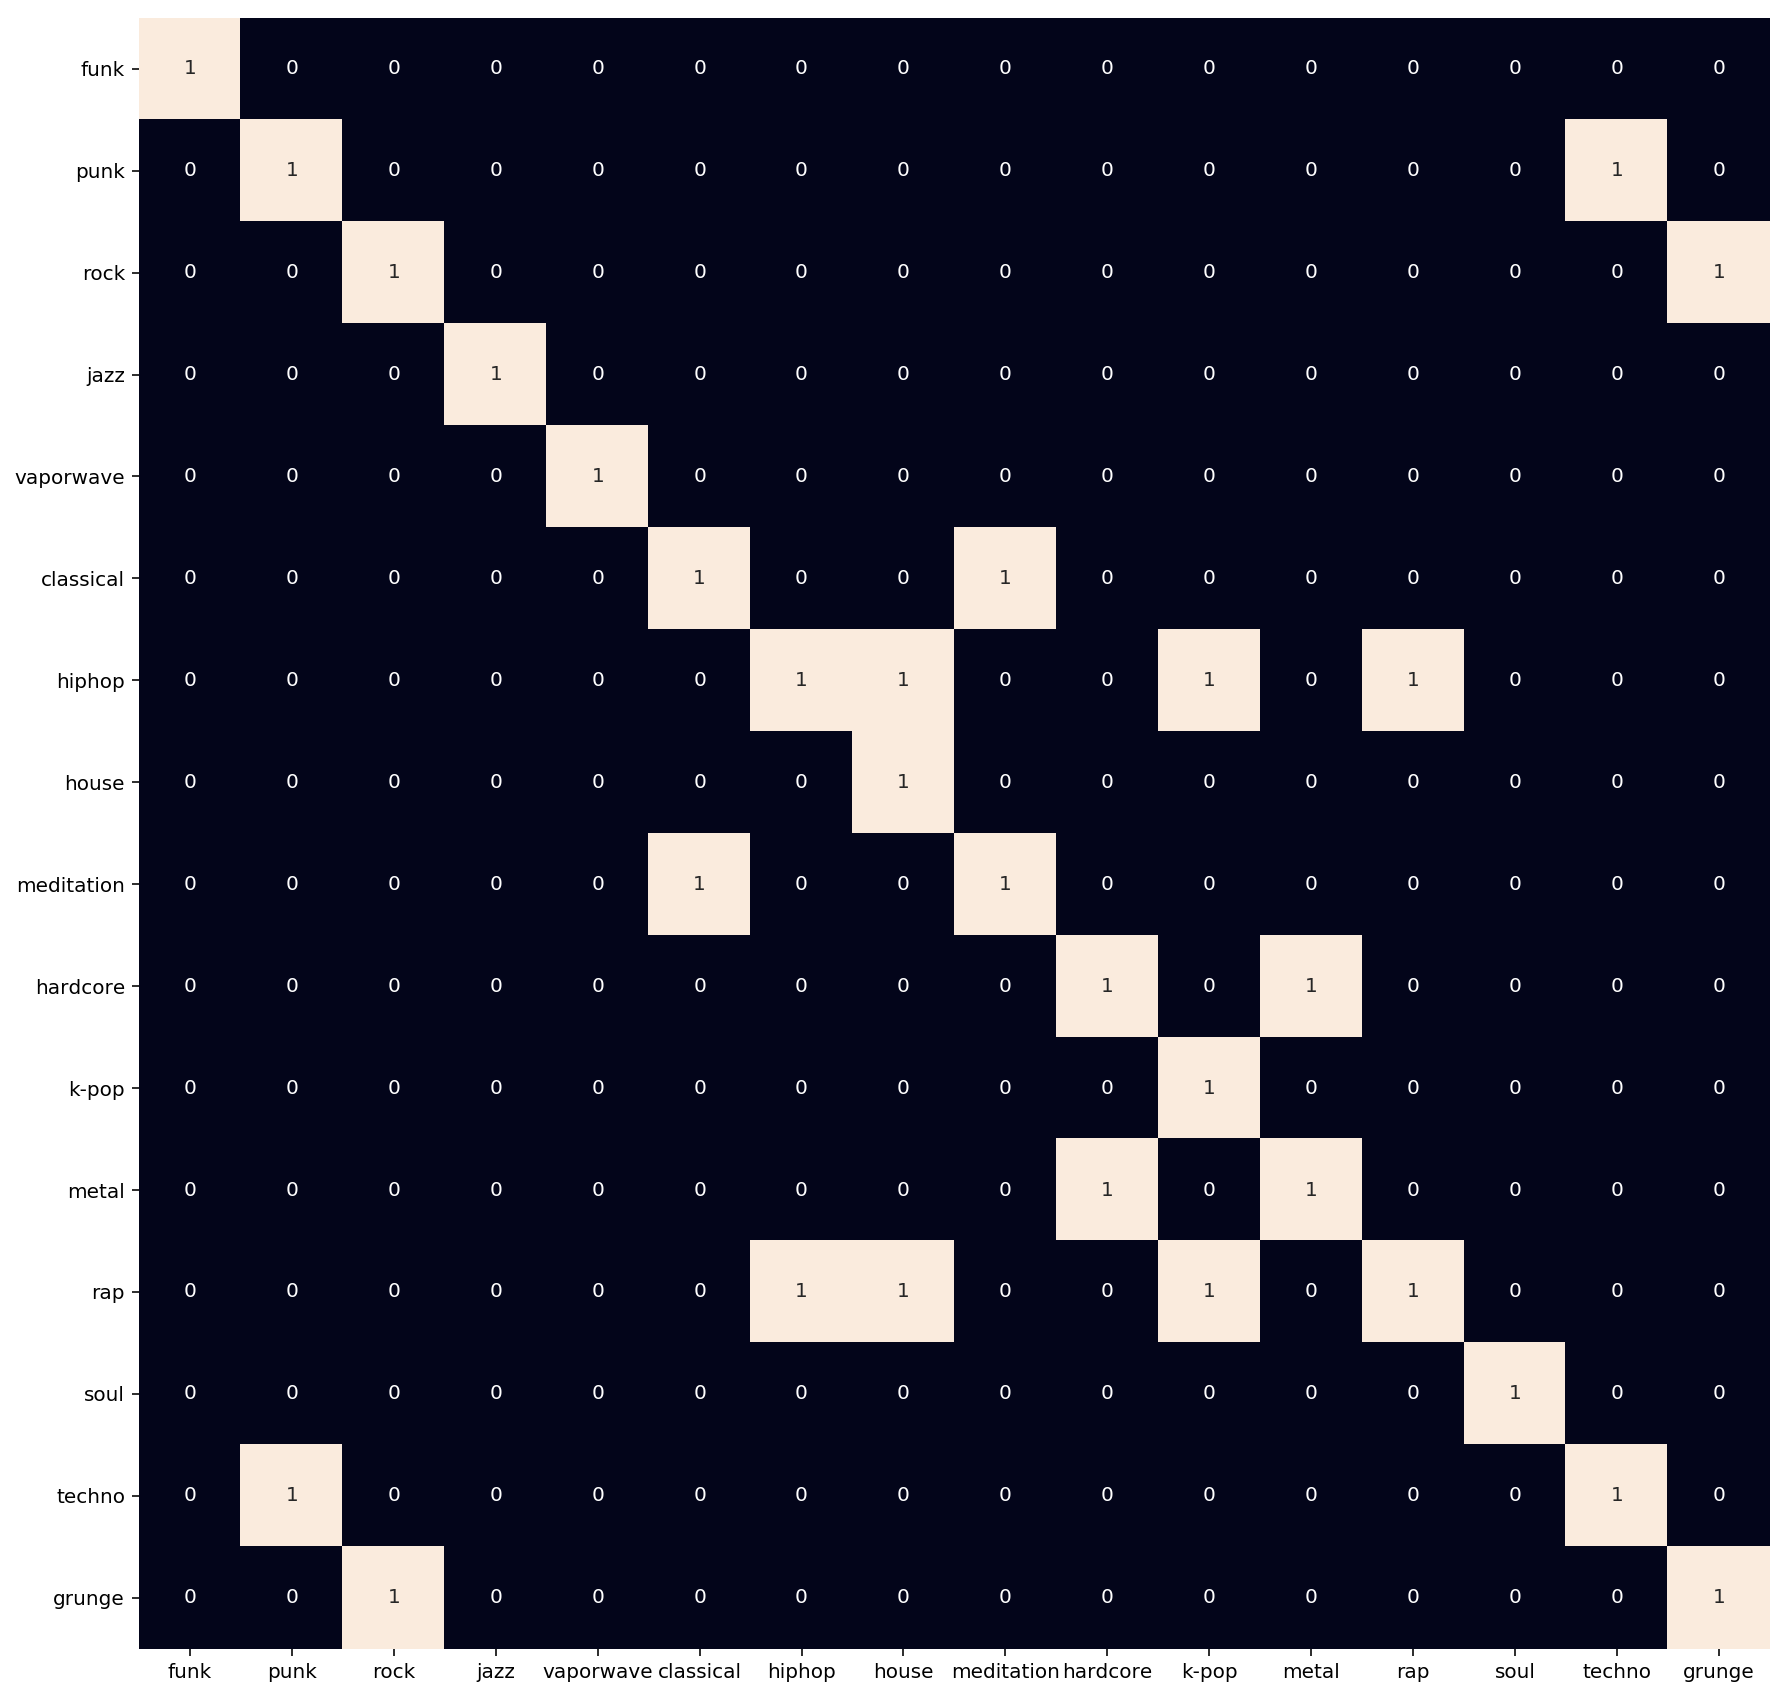

In [171]:
# For all means, create a CI and check if other genres' mean fall into this CI.
# Save the 'confusion matrices' in a file at save_loc.
save_loc = "./"

for val in dfs[0].keys():

    dance_means = np.mean(means[val], axis=1)
    conf_matrix = np.zeros((16, 16))

    for i, dance in enumerate(means[val]):
        a, b = confidence_interval(dance)
        conf_matrix[i, :] = np.logical_and(a <= dance_means, dance_means <= b)

    plt.figure(figsize=(15, 15));
    sns.heatmap(conf_matrix, annot=conf_matrix, cbar=False,  square=True, xticklabels=tags, yticklabels=tags);
    plt.savefig(save_loc + val, format='svg', dpi=1200)